# Ch 6 (?)

# IMPORTS

In [1]:
import random
import pickle
import glob

import random
import ast

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from collections import Counter

from time import time
from time import sleep
from time import strftime
from time import localtime
from tqdm import tqdm

from datetime import date, timedelta, datetime

# from mydecorators import logger, stopwatch





In [2]:
def streak_counter(llist):
  result_dict = {
    ### 0 for Loss
    0: [],
    ### 1 for Win 
    1: []    
  }

  streak_size = 1

  for i in range(len(llist)):
    if i != len(llist)-1:
      if llist[i] != llist[i+1]:
        result_dict[llist[i]].append(streak_size)
        streak_size = 1

      elif llist[i] == llist[i+1]:
        streak_size += 1
    else:
      result_dict[llist[i]].append(streak_size)

  return result_dict


In [3]:
### function for calulating the average of number of consecutive results
def avg_cal(ddict):
  return np.mean(ddict[0]), np.mean(ddict[1])



In [4]:
### streak generator
#### using list.extend

def streak_gen(streak_size, result_size):    ### number of games
  result_streak = []

  n_games = result_size

  n_games_played = 0

  while n_games_played <= n_games:

    streak_size = streak_size
    streak = random.choices(['WS','LS'], weights=(0.5,0.5))[0]

    if streak == 'WS':
      wr = 0.85
      lr = 0.15
      # print(lr,wr)
      
      streak_games = random.choices([0,1], weights=(lr, wr), k=streak_size)
      result_streak.extend(streak_games)

    else:
      wr = 0.15
      lr = 0.85
      # print(lr,wr)
      streak_games = random.choices([0,1], weights=(lr, wr), k=streak_size)
      result_streak.extend(streak_games)

    n_games_played += streak_size


  return result_streak[:result_size]

In [5]:
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i+1, y[i] ,y[i], fontsize=10)

# Generate GAME HISTORIES

## PerfectMM - One Million Games (to use as POPULATION ?)

In [6]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(135)
np.random.seed(135)

# prob_list = np.linspace(0.49,0.51, 100)
prob_list = [0.5]

### when each game is between 49 ~ 51 % (independent)
#### 3000 games per player, 1000 players, totalling 3 million games played

avg_list_0 = []
avg_list_1 = []

one_million_games = []

# number_of_players = 1000
# games_per_player = 3000
number_of_players = 1
games_per_player = 1000000

for _ in range(number_of_players):
    result_n = []

    for _ in range(games_per_player):
        prob_of_0 = random.choice(prob_list)
        prob_of_1 = 1 - prob_of_0
        
        one_game = np.random.choice([0,1], 1, p = [prob_of_0, prob_of_1])[0]
        result_n.append(one_game)
    
    streak_counter_result = streak_counter(result_n)
    
    ### add to one_million_games (3000 players)
    one_million_games.append(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-03-26 15:38:03



----------------------------------------------------
done in 7.309s.
2024-03-26 15:38:10


In [7]:
# one_million_games[0][:10]

In [8]:
### one_million_games[0][:10]

# perfectmm_counted = streak_counter(one_million_games[0][:])
perfectmm_counted = streak_counter(one_million_games[0])

In [9]:
print('MAX MIN of Losing Streaks')
print(np.max(perfectmm_counted[0]))
print(np.min(perfectmm_counted[0]))

print('MAX MIN of Win Streaks')
print(np.max(perfectmm_counted[1]))
print(np.min(perfectmm_counted[1]))

print('Averages')
print(f'L: {np.mean(perfectmm_counted[0])}')
print(f'W: {np.mean(perfectmm_counted[1])}')

print('Standard Deviations')
print(f'L: {np.std(perfectmm_counted[0])}')
print(f'W: {np.std(perfectmm_counted[1])}')

MAX MIN of Losing Streaks
17
1
MAX MIN of Win Streaks
20
1
Averages
L: 2.003923721884669
W: 2.0039557691305725
Standard Deviations
L: 1.4168229150676865
W: 1.419380547217041


In [10]:
print(f'sum of L streak : {np.sum(perfectmm_counted[0])}')
print(f'sum of W streak : {np.sum(perfectmm_counted[1])}')

sum of L streak : 499995
sum of W streak : 500005


In [11]:
# print(np.max(streak_counter(one_million_games[0][:])[0]))
# print(np.min(streak_counter(one_million_games[0][:])[0]))

# print(np.max(streak_counter(one_million_games[0][:])[1]))
# print(np.min(streak_counter(one_million_games[0][:])[1]))



# print(np.mean(streak_counter(one_million_games[0])[0]))
# print(np.mean(streak_counter(one_million_games[0])[1]))

# print(np.std(streak_counter(one_million_games[0])[0]))
# print(np.std(streak_counter(one_million_games[0])[1]))

In [12]:
# perfectmm_counted[0]

In [39]:
streaks = []

streaks_0 = list(perfectmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(perfectmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))



# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-2, -1, -1, -5, -1, -3, -1, -1, -2, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -4]
-2.003923721884669
1.4168229150676865
[1, 2, 2, 1, 3, 1, 3, 4, 2, 6, 1, 1, 2, 4, 1, 5, 5, 1, 1, 7]
2.0039557691305725
1.419380547217041
----
2.003939745539731e-05
2.4549518663543686


## NearPerfectMM - One Million Games

In [22]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(2237)
np.random.seed(2237)

prob_list = np.linspace(0.49,0.51, 100)

### when each game is between 49 ~ 51 % (independent)
#### 3000 games per player, 1000 players, totalling 3 million games played

avg_list_0 = []
avg_list_1 = []

nearperfect_all_records = []

number_of_players = 1
games_per_player = 1000000


for _ in range(number_of_players):
    result_n = []

    for _ in range(games_per_player):
        prob_of_0 = random.choice(prob_list)
        prob_of_1 = 1 - prob_of_0

        one_game = np.random.choice([0,1], 1, p = [prob_of_0, prob_of_1])[0]
        result_n.append(one_game)
    
    streak_counter_result = streak_counter(result_n)
    
    ### add to nearperfect_all_records (3000 players)
    nearperfect_all_records.append(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-03-26 15:42:38



----------------------------------------------------
done in 7.184s.
2024-03-26 15:42:45


In [23]:
print(np.mean(avg_list_0))
print(np.mean(avg_list_1))


2.0011037704157535
1.9980644026042582


In [24]:
# nearperfectmm_counted = streak_counter(nearperfect_all_records[0][:])
nearperfectmm_counted = streak_counter(nearperfect_all_records[0])

In [25]:
print('MAX MIN of Losing Streaks')
print(np.max(nearperfectmm_counted[0]))
print(np.min(nearperfectmm_counted[0]))

print('MAX MIN of Win Streaks')
print(np.max(nearperfectmm_counted[1]))
print(np.min(nearperfectmm_counted[1]))

print('Averages')
print(f'L: {np.mean(nearperfectmm_counted[0])}')
print(f'W: {np.mean(nearperfectmm_counted[1])}')

print('Standard Deviations')
print(f'L: {np.std(nearperfectmm_counted[0])}')
print(f'W: {np.std(nearperfectmm_counted[1])}')

MAX MIN of Losing Streaks
20
1
MAX MIN of Win Streaks
23
1
Averages
L: 2.0011037704157535
W: 1.9980644026042582
Standard Deviations
L: 1.4167982423222778
W: 1.4148511856294026


In [26]:
print(f'sum of L streak : {np.sum(nearperfectmm_counted[0])}')
print(f'sum of W streak : {np.sum(nearperfectmm_counted[1])}')

sum of L streak : 500380
sum of W streak : 499620


In [27]:
# ### streak_all_records = million games from StreakMM

# print(np.max(streak_counter(nearperfect_all_records[0][:])[0]))
# print(np.min(streak_counter(nearperfect_all_records[0][:])[0]))

# print(np.max(streak_counter(nearperfect_all_records[0][:])[1]))
# print(np.min(streak_counter(nearperfect_all_records[0][:])[1]))



# print(np.mean(streak_counter(nearperfect_all_records[0])[0]))
# print(np.mean(streak_counter(nearperfect_all_records[0])[1]))

# print(np.std(streak_counter(nearperfect_all_records[0])[0]))
# print(np.std(streak_counter(nearperfect_all_records[0])[1]))

In [28]:
streaks = []

streaks_0 = list(nearperfectmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(nearperfectmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))



# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-1, -1, -1, -3, -1, -2, -2, -2, -2, -2, -2, -1, -2, -1, -4, -1, -1, -3, -2, -1]
-2.0011037704157535
1.4167982423222778
[3, 2, 1, 2, 2, 2, 4, 1, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1]
1.9980644026042582
1.4148511856294026
----
-0.0015196839057476045
2.450081036922303


## StreakMM - One Million Games

In [29]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(1576)
np.random.seed(1576)

### when streaks exist
### ws:ls = 50:50
### 85% of win/loss depending on the streak

avg_list_0 = []
avg_list_1 = []

streak_all_records = []
for _ in range(1):
    result_n = streak_gen(6, 1_000_000)
    
    # streak_all_records.append(pd.Series(result_n))
    streak_all_records.append(result_n)
    
    streak_counter_result = streak_counter(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-03-26 15:43:27



----------------------------------------------------
done in 0.315s.
2024-03-26 15:43:27


In [30]:
avg_cal_result


(3.3715100600834003, 3.3870505542038387)

In [31]:
print(np.mean(avg_list_0))
print(np.mean(avg_list_1))


3.3715100600834003
3.3870505542038387


In [32]:
# streakmm_counted = streak_counter(streak_all_records[0][:])
streakmm_counted = streak_counter(streak_all_records[0])

In [33]:
print('MAX MIN of Losing Streaks')
print(np.max(streakmm_counted[0]))
print(np.min(streakmm_counted[0]))

print('MAX MIN of Win Streaks')
print(np.max(streakmm_counted[1]))
print(np.min(streakmm_counted[1]))

print('Averages')
print(f'L: {np.mean(streakmm_counted[0])}')
print(f'W: {np.mean(streakmm_counted[1])}')

print('Standard Deviations')
print(f'L: {np.std(streakmm_counted[0])}')
print(f'W: {np.std(streakmm_counted[1])}')

MAX MIN of Losing Streaks
52
1
MAX MIN of Win Streaks
39
1
Averages
L: 3.3715100600834003
W: 3.3870505542038387
Standard Deviations
L: 3.400960275967006
W: 3.4216191520092782


In [34]:
print(f'sum of L streak : {np.sum(streakmm_counted[0])}')
print(f'sum of W streak : {np.sum(streakmm_counted[1])}')

sum of L streak : 498852
sum of W streak : 501148


In [35]:
# ### streak_all_records = million games from StreakMM

# print(np.max(streak_counter(streak_all_records[0][:])[0]))
# print(np.min(streak_counter(streak_all_records[0][:])[0]))

# print(np.max(streak_counter(streak_all_records[0][:])[1]))
# print(np.min(streak_counter(streak_all_records[0][:])[1]))



# print(np.mean(streak_counter(streak_all_records[0])[0]))
# print(np.mean(streak_counter(streak_all_records[0])[1]))

# print(np.std(streak_counter(streak_all_records[0])[0]))
# print(np.std(streak_counter(streak_all_records[0])[1]))

In [36]:
streaks = []

streaks_0 = list(streakmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(streakmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))



# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-6, -3, -7, -1, -1, -5, -25, -1, -5, -6, -1, -2, -1, -1, -6, -7, -1, -3, -1, -1]
-3.3715100600834003
3.400960275967006
[1, 2, 4, 2, 2, 1, 4, 1, 1, 7, 4, 1, 1, 6, 5, 1, 1, 4, 3, 3]
3.3870505542038387
3.4216191520092782
----
0.007758827524913744
4.8017225415490215


In [45]:
(0-0.007758827524913744)/np.sqrt(2.4549518663543686**2 + 4.8017225415490215**2)

### -0.0014349967115323884

-0.0014387125994693578

In [46]:
2.4549518663543686**2/4.8017225415490215**2

0.26139172797973703

In [47]:
### f-test
4.8017225415490215**2/2.4549518663543686**2

3.825675769194653

### Counter

In [225]:
print(f'L streak counted : {Counter(perfectmm_counted[0])}')
print(f'L streak counted : {Counter(perfectmm_counted[1])}')

L streak counted : Counter({1: 124404, 2: 62676, 3: 30936, 4: 15672, 5: 7940, 6: 3955, 7: 2003, 8: 979, 9: 461, 10: 248, 11: 111, 12: 55, 13: 28, 14: 24, 15: 9, 16: 4, 17: 3})
L streak counted : Counter({1: 124601, 2: 62144, 3: 31575, 4: 15466, 5: 7824, 6: 3812, 7: 2093, 8: 1013, 9: 523, 10: 228, 11: 104, 12: 58, 13: 39, 14: 12, 15: 6, 16: 6, 20: 2, 17: 2, 18: 1})


In [226]:
print(f'L streak counted : {Counter(nearperfectmm_counted[0])}')
print(f'L streak counted : {Counter(nearperfectmm_counted[1])}')

L streak counted : Counter({1: 125225, 2: 62204, 3: 31120, 4: 15849, 5: 7717, 6: 4078, 7: 1916, 8: 961, 9: 476, 10: 254, 11: 117, 12: 77, 13: 34, 14: 10, 15: 8, 16: 4, 17: 1, 20: 1})
L streak counted : Counter({1: 125231, 2: 62650, 3: 30970, 4: 15522, 5: 7842, 6: 3902, 7: 1946, 8: 1003, 9: 493, 10: 274, 11: 107, 12: 56, 13: 21, 14: 20, 15: 8, 16: 3, 18: 2, 23: 1, 17: 1})


In [227]:
print(f'L streak counted : {Counter(streakmm_counted[0])}')
print(f'L streak counted : {Counter(streakmm_counted[1])}')

L streak counted : Counter({1: 63848, 2: 21473, 3: 13441, 6: 10454, 4: 10201, 5: 8198, 7: 5306, 8: 3398, 9: 2420, 12: 1995, 10: 1896, 11: 1586, 13: 981, 14: 590, 15: 467, 18: 377, 16: 316, 17: 300, 19: 205, 20: 103, 21: 82, 22: 76, 24: 63, 23: 56, 25: 37, 27: 15, 29: 14, 30: 13, 28: 13, 26: 12, 33: 7, 31: 6, 32: 3, 36: 2, 34: 2, 35: 2, 40: 1, 39: 1, 52: 1})
L streak counted : Counter({1: 63688, 2: 21255, 3: 13532, 6: 10441, 4: 10327, 5: 8261, 7: 5374, 8: 3301, 9: 2492, 12: 1983, 10: 1874, 11: 1520, 13: 1021, 14: 644, 15: 480, 18: 392, 16: 358, 17: 270, 19: 198, 20: 128, 21: 79, 22: 77, 24: 71, 23: 60, 25: 36, 26: 30, 27: 16, 30: 10, 31: 8, 29: 7, 28: 6, 34: 5, 36: 5, 32: 4, 37: 3, 33: 2, 38: 1, 39: 1})


# Ch 7 - Distribution Plots

## PerfectMM

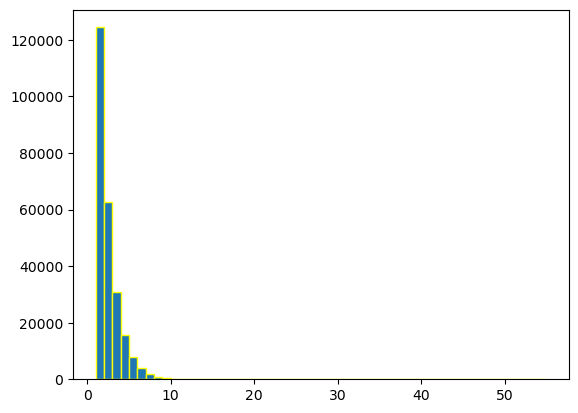

In [228]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(perfectmm_counted[0], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

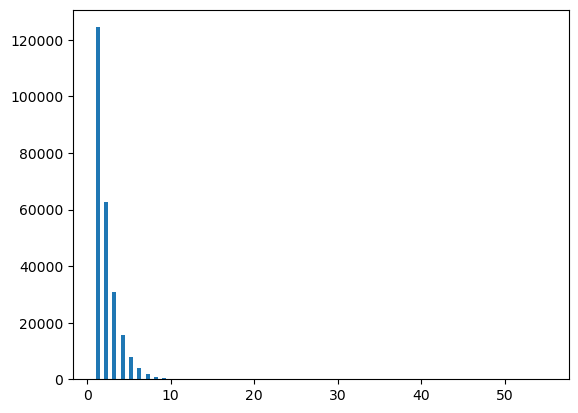

In [229]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(perfectmm_counted[0], bins=np.arange(1, 55.5, 0.5))
plt.show()

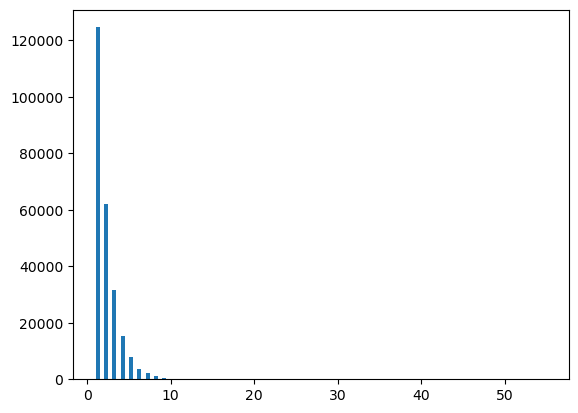

In [230]:
# plt.hist(perfectmm_counted[1], bins=15)
plt.hist(perfectmm_counted[1], bins=np.arange(1, 55.5, 0.5))
plt.show()

## NearPerfectMM

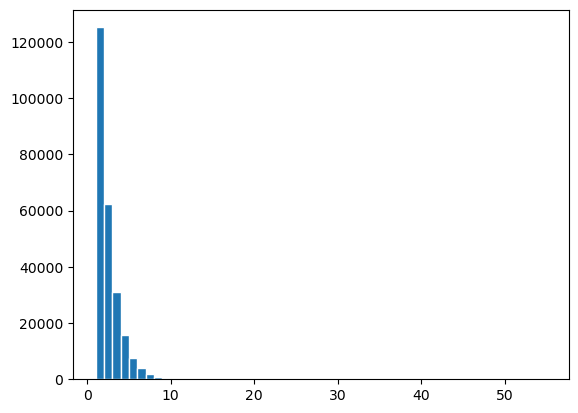

In [55]:
# plt.hist(nearperfectmm_counted[0], bins=15)
plt.hist(nearperfectmm_counted[0], edgecolor='white', bins=np.arange(1, 56, 1))
plt.show()

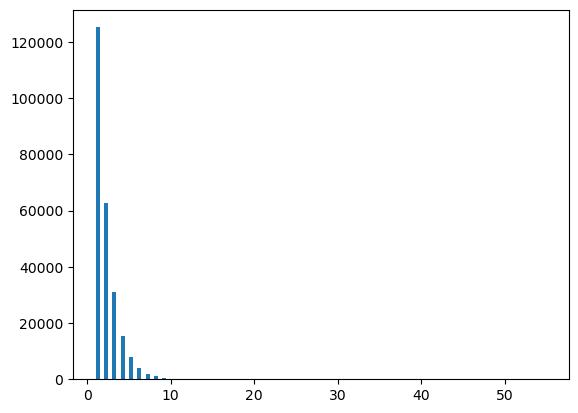

In [31]:
# plt.hist(nearperfectmm_counted[1], bins=15)
plt.hist(nearperfectmm_counted[1], bins=np.arange(1, 55.5, 0.5))
plt.show()

## StreakMM

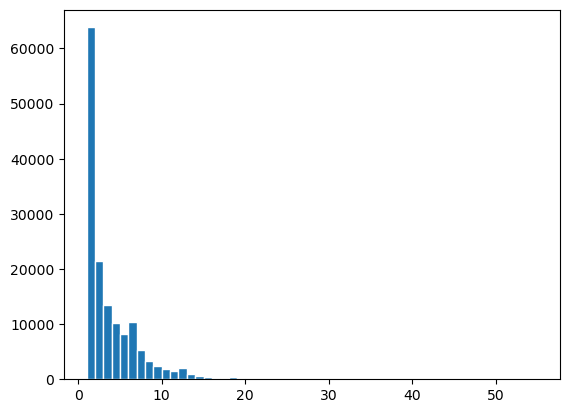

In [56]:
# plt.hist(streakmm_counted[0], bins=70)
plt.hist(streakmm_counted[0], edgecolor='white', bins=np.arange(1, 56, 1))
plt.show()

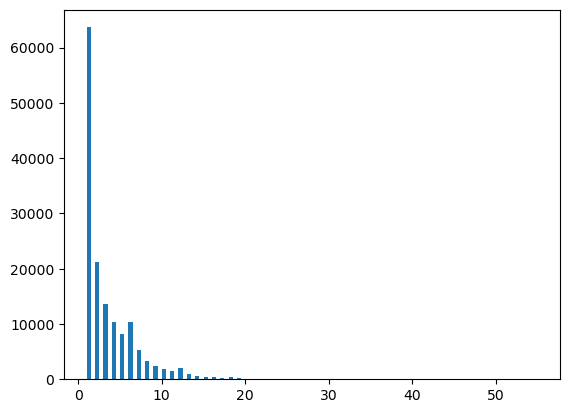

In [33]:
# plt.hist(streakmm_counted[0], bins=15)
plt.hist(streakmm_counted[1], bins=np.arange(1, 55.5, 0.5))
plt.show()

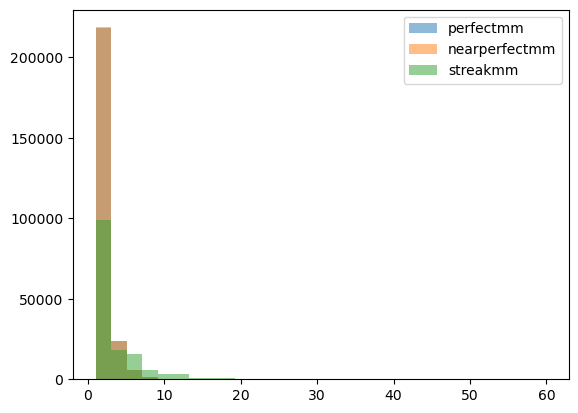

In [34]:
bins = np.linspace(1, 60, 30)
plt.hist(perfectmm_counted[0], bins, alpha=0.5, label='perfectmm')
plt.hist(nearperfectmm_counted[0], bins, alpha=0.5, label='nearperfectmm')
plt.hist(streakmm_counted[0], bins, alpha=0.5, label='streakmm')
plt.legend(loc='upper right')
plt.show()

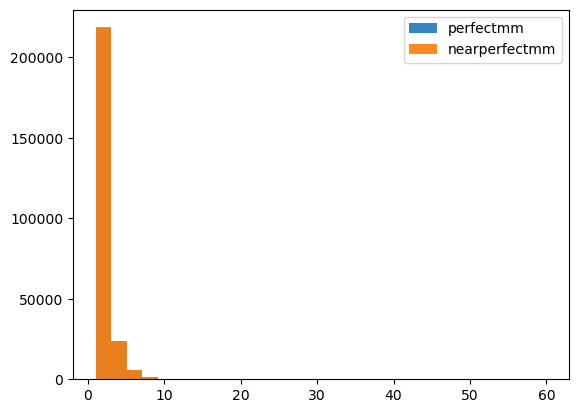

In [35]:
bins = np.linspace(1, 60, 30)
alpha = 0.9
plt.hist(perfectmm_counted[0], bins, alpha=alpha, label='perfectmm')
plt.hist(nearperfectmm_counted[0], bins, alpha=alpha, label='nearperfectmm')
# plt.hist(streakmm_counted[0], bins, alpha=alpha, label='streakmm')
plt.legend(loc='upper right')
plt.show()

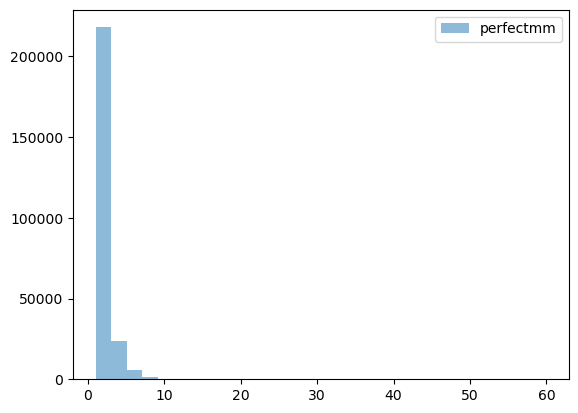

In [36]:
bins = np.linspace(1, 60, 30)
plt.hist(perfectmm_counted[0], bins, alpha=0.5, label='perfectmm')
# plt.hist(nearperfectmm_counted[0], bins, alpha=0.5, label='nearperfectmm')
# plt.hist(streakmm_counted[0], bins, alpha=0.5, label='streakmm')
plt.legend(loc='upper right')
plt.show()

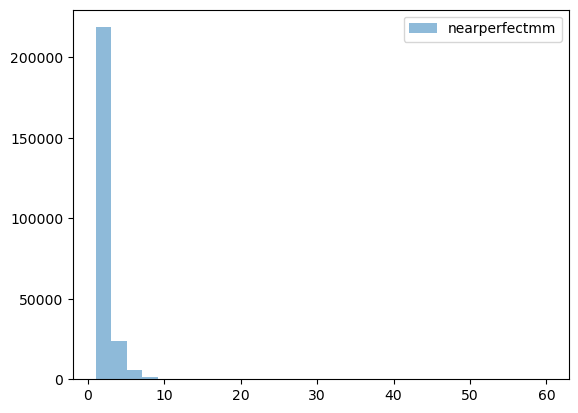

In [37]:
bins = np.linspace(1, 60, 30)
# plt.hist(perfectmm_counted[0], bins, alpha=0.5, label='perfectmm')
plt.hist(nearperfectmm_counted[0], bins, alpha=0.5, label='nearperfectmm')
# plt.hist(streakmm_counted[0], bins, alpha=0.5, label='streakmm')
plt.legend(loc='upper right')
plt.show()

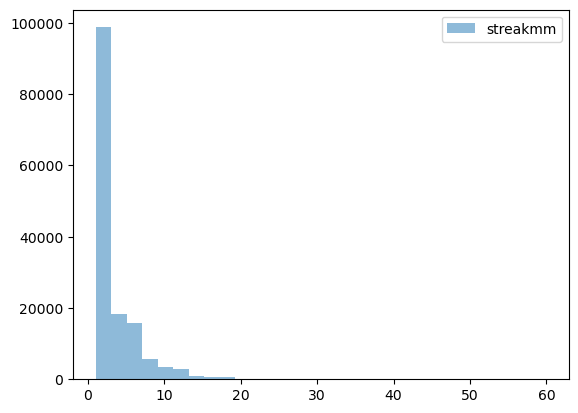

In [38]:
bins = np.linspace(1, 60, 30)
# plt.hist(perfectmm_counted[0], bins, alpha=0.5, label='perfectmm')
# plt.hist(nearperfectmm_counted[0], bins, alpha=0.5, label='nearperfectmm')
plt.hist(streakmm_counted[0], bins, alpha=0.5, label='streakmm')
plt.legend(loc='upper right')
plt.show()

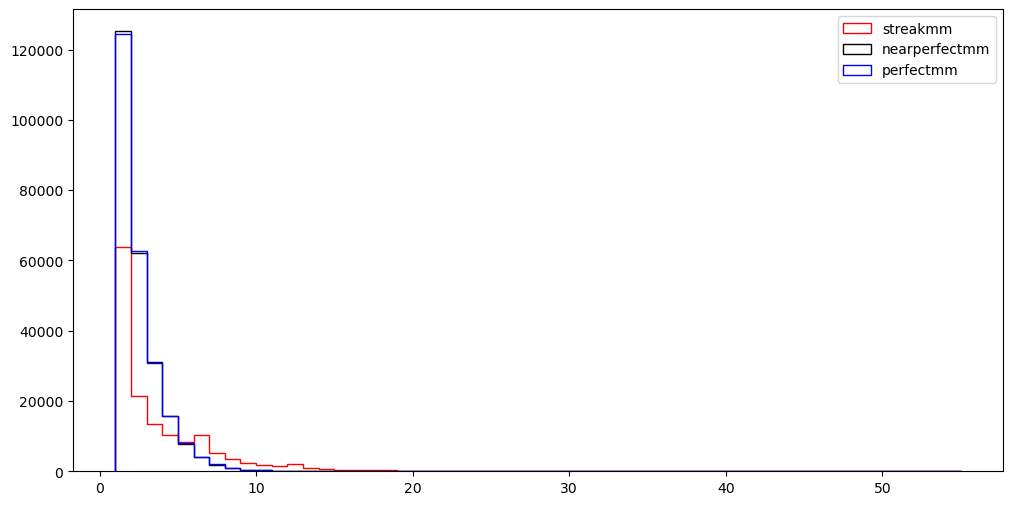

In [39]:
# bins = np.linspace(0, 60, 30)
# plt.hist(perfectmm_counted[0], bins, alpha=0.5, label='perfectmm')
# plt.hist(nearperfectmm_counted[0], bins, alpha=0.5, label='nearperfectmm')
# plt.hist(streakmm_counted[0], bins, alpha=0.5, label='streakmm')
combined = [perfectmm_counted[0], nearperfectmm_counted[0], streakmm_counted[0]]
labels = ['perfectmm', 'nearperfectmm', 'streakmm']

plt.figure(figsize=(12,6))
# plt.hist(combined, bins=np.arange(1,56,1), alpha=0.9, label=labels, rwidth=0.5)
# plt.hist(combined, bins=np.arange(1,56,1), alpha=0.9, label=labels, stacked=False, histtype='bar', width=0.3)
plt.hist(combined, bins=np.arange(1,56,1), alpha=1, label=labels, stacked=False, histtype='step', color=['blue', 'black', 'red'])
# plt.hist(combined, bins=np.arange(1,56,1), alpha=1, label=labels, stacked=False, histtype='step', color=['blue', 'black', 'red'], log=True)
plt.legend(loc='upper right')
plt.show()

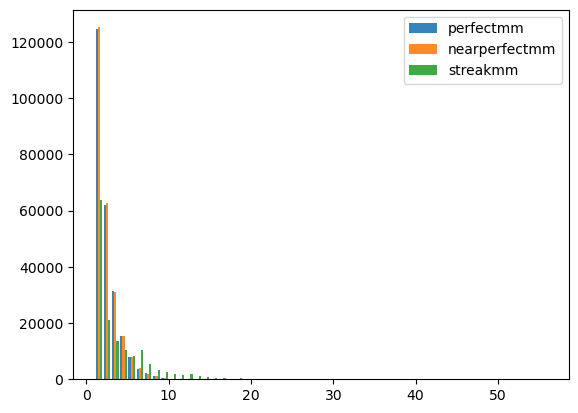

In [40]:
bins = np.linspace(1, 56, 56)
# plt.hist(perfectmm_counted[0], bins, alpha=0.5, label='perfectmm')
# plt.hist(nearperfectmm_counted[0], bins, alpha=0.5, label='nearperfectmm')
# plt.hist(streakmm_counted[0], bins, alpha=0.5, label='streakmm')
combined = [perfectmm_counted[1], nearperfectmm_counted[1], streakmm_counted[1]]
labels = ['perfectmm', 'nearperfectmm', 'streakmm']

plt.hist(combined, bins, alpha=0.9, label=labels)
plt.legend(loc='upper right')
plt.show()

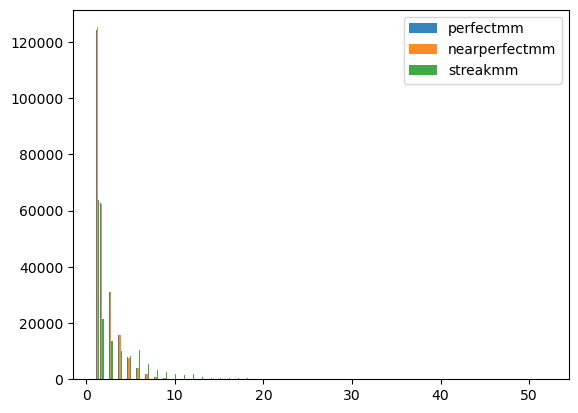

In [41]:
# bins = np.linspace(0, 60, 30)
# bins=np.arange(1, 55.5, 0.5)
# plt.hist(perfectmm_counted[0], bins, alpha=0.5, label='perfectmm')
# plt.hist(nearperfectmm_counted[0], bins, alpha=0.5, label='nearperfectmm')
# plt.hist(streakmm_counted[0], bins, alpha=0.5, label='streakmm')
combined = [perfectmm_counted[0], nearperfectmm_counted[0], streakmm_counted[0]]
labels = ['perfectmm', 'nearperfectmm', 'streakmm']

# plt.hist(combined, bins, alpha=0.9, label=labels, width=0.3)
# plt.hist(combined, bins='doane', alpha=0.9, label=labels)
plt.hist(combined, alpha=0.9, label=labels, bins=100)
plt.legend(loc='upper right')
plt.show()

In [42]:
6*0.85*0.5

2.55

In [43]:
6*0.15*0.5

0.44999999999999996

## Modifying Skewed Data ?

In [44]:
# dict(Counter(perfectmm_counted[0]))[1]
np.log(2)

0.6931471805599453

In [45]:
logged_perfectmm_0 = np.log(perfectmm_counted[0])

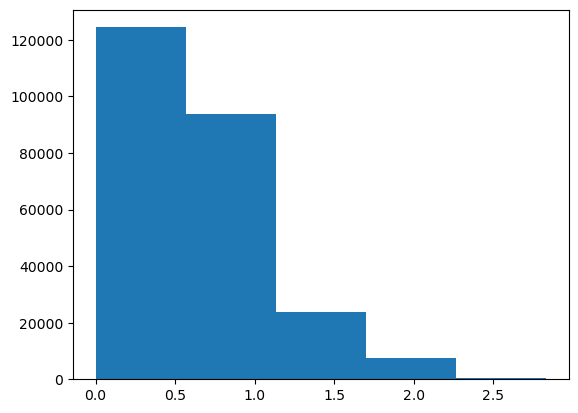

In [46]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(logged_perfectmm_0, bins=5)
# plt.hist(logged_perfectmm_0)
plt.show()

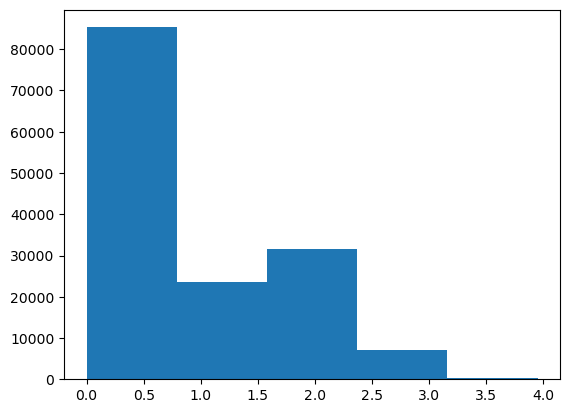

In [47]:
logged_streakmm_0 = np.log(streakmm_counted[0])

# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(logged_streakmm_0, bins=5)
plt.show()

In [48]:
logged_streakmm_0

array([1.79175947, 1.09861229, 1.94591015, ..., 0.69314718, 1.60943791,
       2.19722458])

In [49]:
perfectmm_counted[0][:20]

[2, 1, 1, 5, 1, 3, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 4]

In [50]:
np.log(6)

1.791759469228055

# Using Counter Dicts

In [231]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i+0.8, y[i]+1000 ,y[i], fontsize=10)

In [232]:
Counter(perfectmm_counted[0])

Counter({1: 124404,
         2: 62676,
         3: 30936,
         4: 15672,
         5: 7940,
         6: 3955,
         7: 2003,
         8: 979,
         9: 461,
         10: 248,
         11: 111,
         12: 55,
         13: 28,
         14: 24,
         15: 9,
         16: 4,
         17: 3})

In [233]:
perfect_dict_0 = Counter(perfectmm_counted[0])
# perfect_dict_1 = Counter(perfectmm_counted[1])

# sorted(perfect_dict_0.items())

streak_sizes = sorted(list(perfect_dict_0.keys()))
# frequencies = list(perfect_dict_0.values())
frequencies = [perfect_dict_0[x] for x in streak_sizes]

print(streak_sizes)
print(frequencies)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[124404, 62676, 30936, 15672, 7940, 3955, 2003, 979, 461, 248, 111, 55, 28, 24, 9, 4, 3]


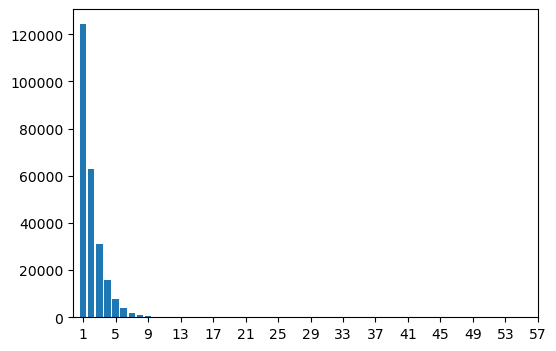

In [234]:
plt.figure(figsize=(6,4))
plt.bar(streak_sizes, frequencies)
plt.xticks(np.arange(1, 60, 4))
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

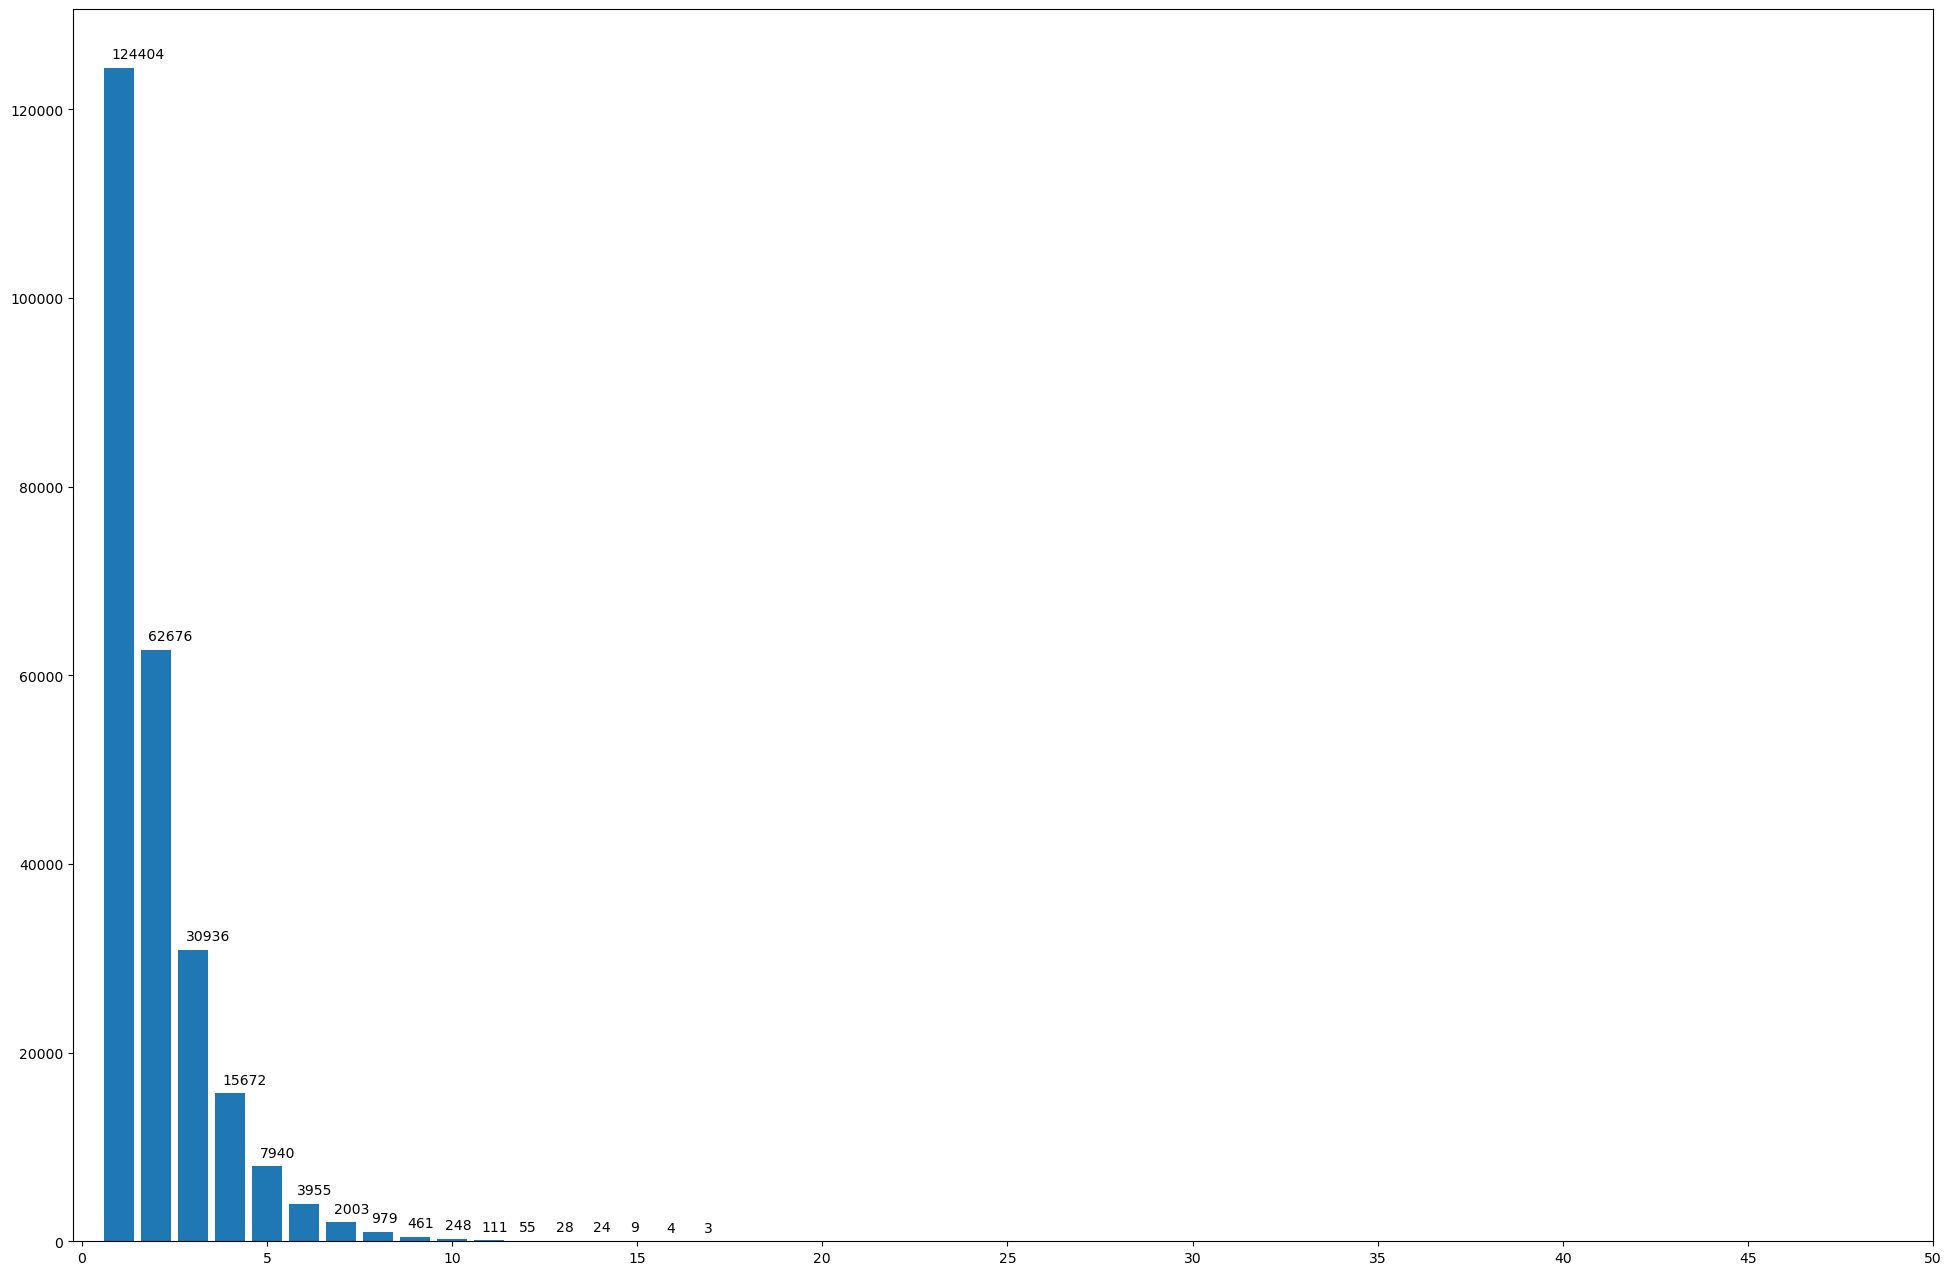

In [235]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes, frequencies)
plt.xticks(np.arange(0, 55, 5))
addlabels(streak_sizes, frequencies)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

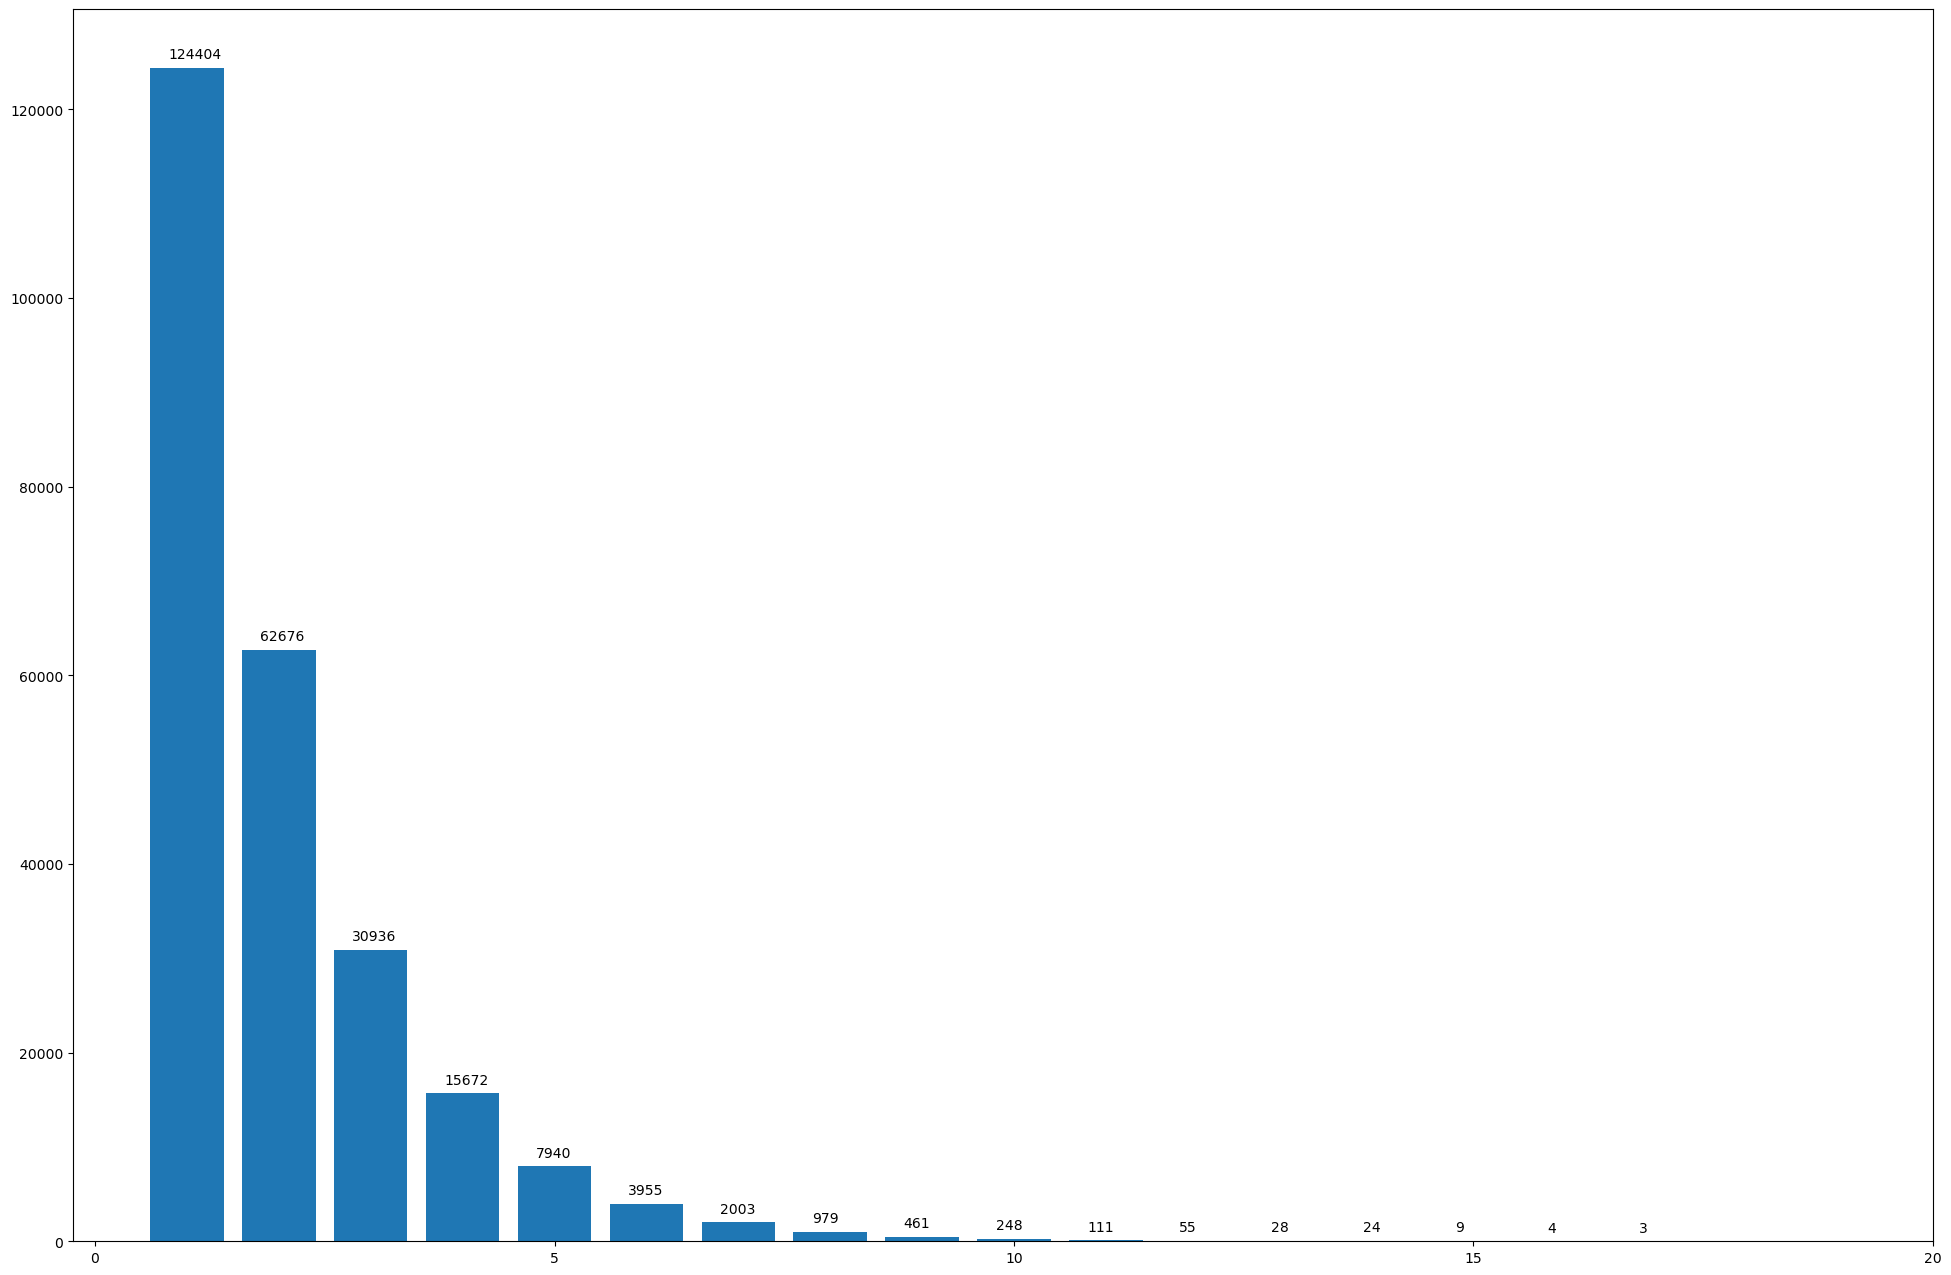

In [236]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes, frequencies)
plt.xticks(np.arange(0, 25, 5))
addlabels(streak_sizes, frequencies)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

## Histograms for...

### PerfectMM 0

In [312]:
perfect_dict_0 = Counter(perfectmm_counted[0])
# perfect_dict_1 = Counter(perfectmm_counted[1])

# sorted(perfect_dict_0.items())

streak_sizes = sorted(list(perfect_dict_0.keys()))
streak_sizes = list(np.arange(min(streak_sizes), max(streak_sizes)+1, 1))
# frequencies = list(perfect_dict_0.values())
frequencies = [perfect_dict_0[x] for x in streak_sizes]

print(streak_sizes)
print(frequencies)

# print(np.sum(frequencies))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[124404, 62676, 30936, 15672, 7940, 3955, 2003, 979, 461, 248, 111, 55, 28, 24, 9, 4, 3]


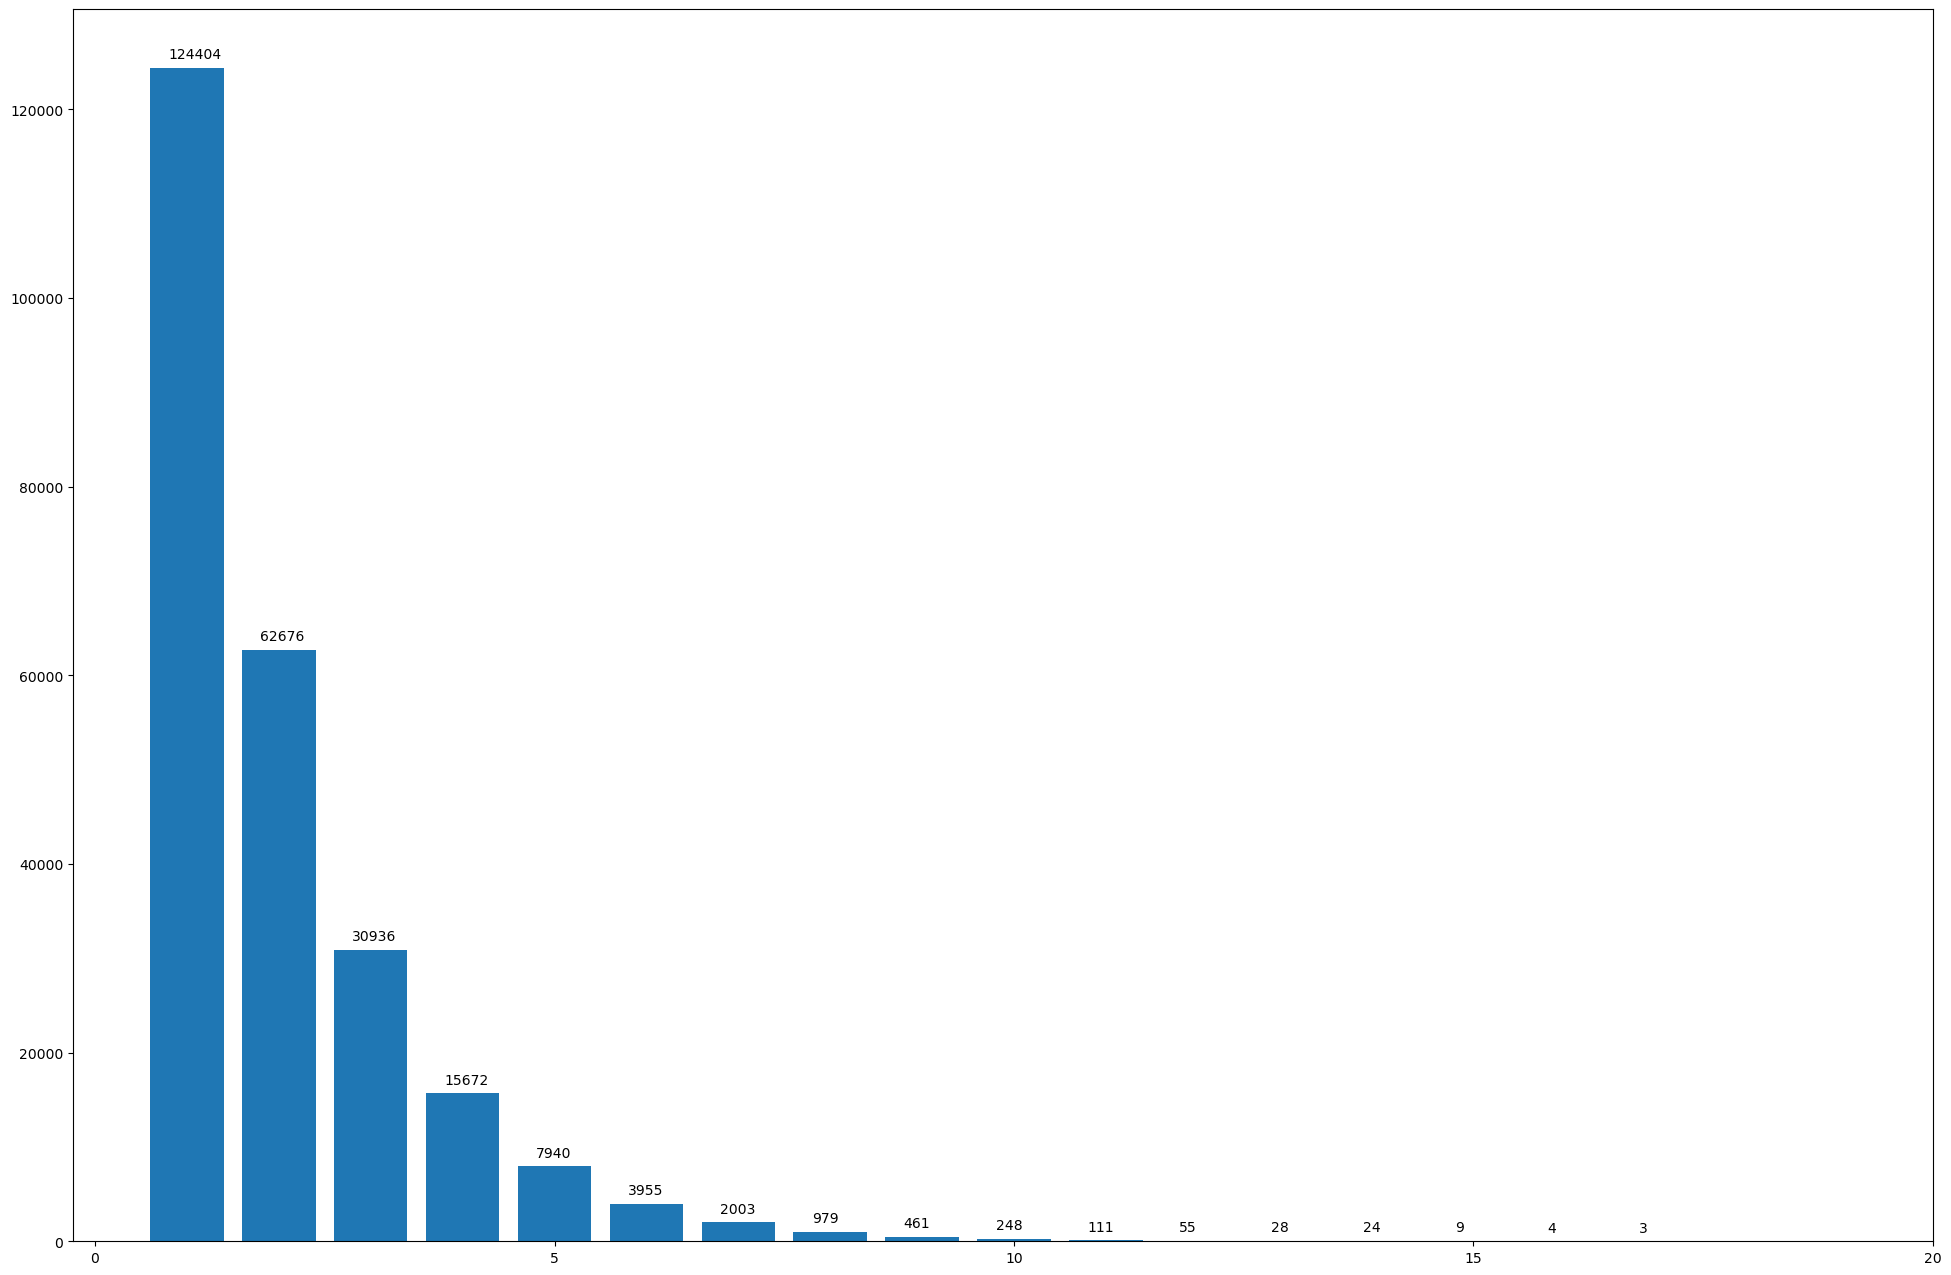

In [313]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes, frequencies)
# plt.xticks(np.arange(0, 55, 5))
plt.xticks(np.arange(0, 25, 5))
addlabels(streak_sizes, frequencies)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

### PerfectMM 1

In [314]:
perfect_dict_1 = Counter(perfectmm_counted[1])

# sorted(perfect_dict_0.items())

streak_sizes = sorted(list(perfect_dict_1.keys()))
streak_sizes = list(np.arange(min(streak_sizes), max(streak_sizes)+1, 1))
# frequencies = list(perfect_dict_0.values())
frequencies = [perfect_dict_1[x] for x in streak_sizes]

print(streak_sizes)
print(frequencies)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[124601, 62144, 31575, 15466, 7824, 3812, 2093, 1013, 523, 228, 104, 58, 39, 12, 6, 6, 2, 1, 0, 2]


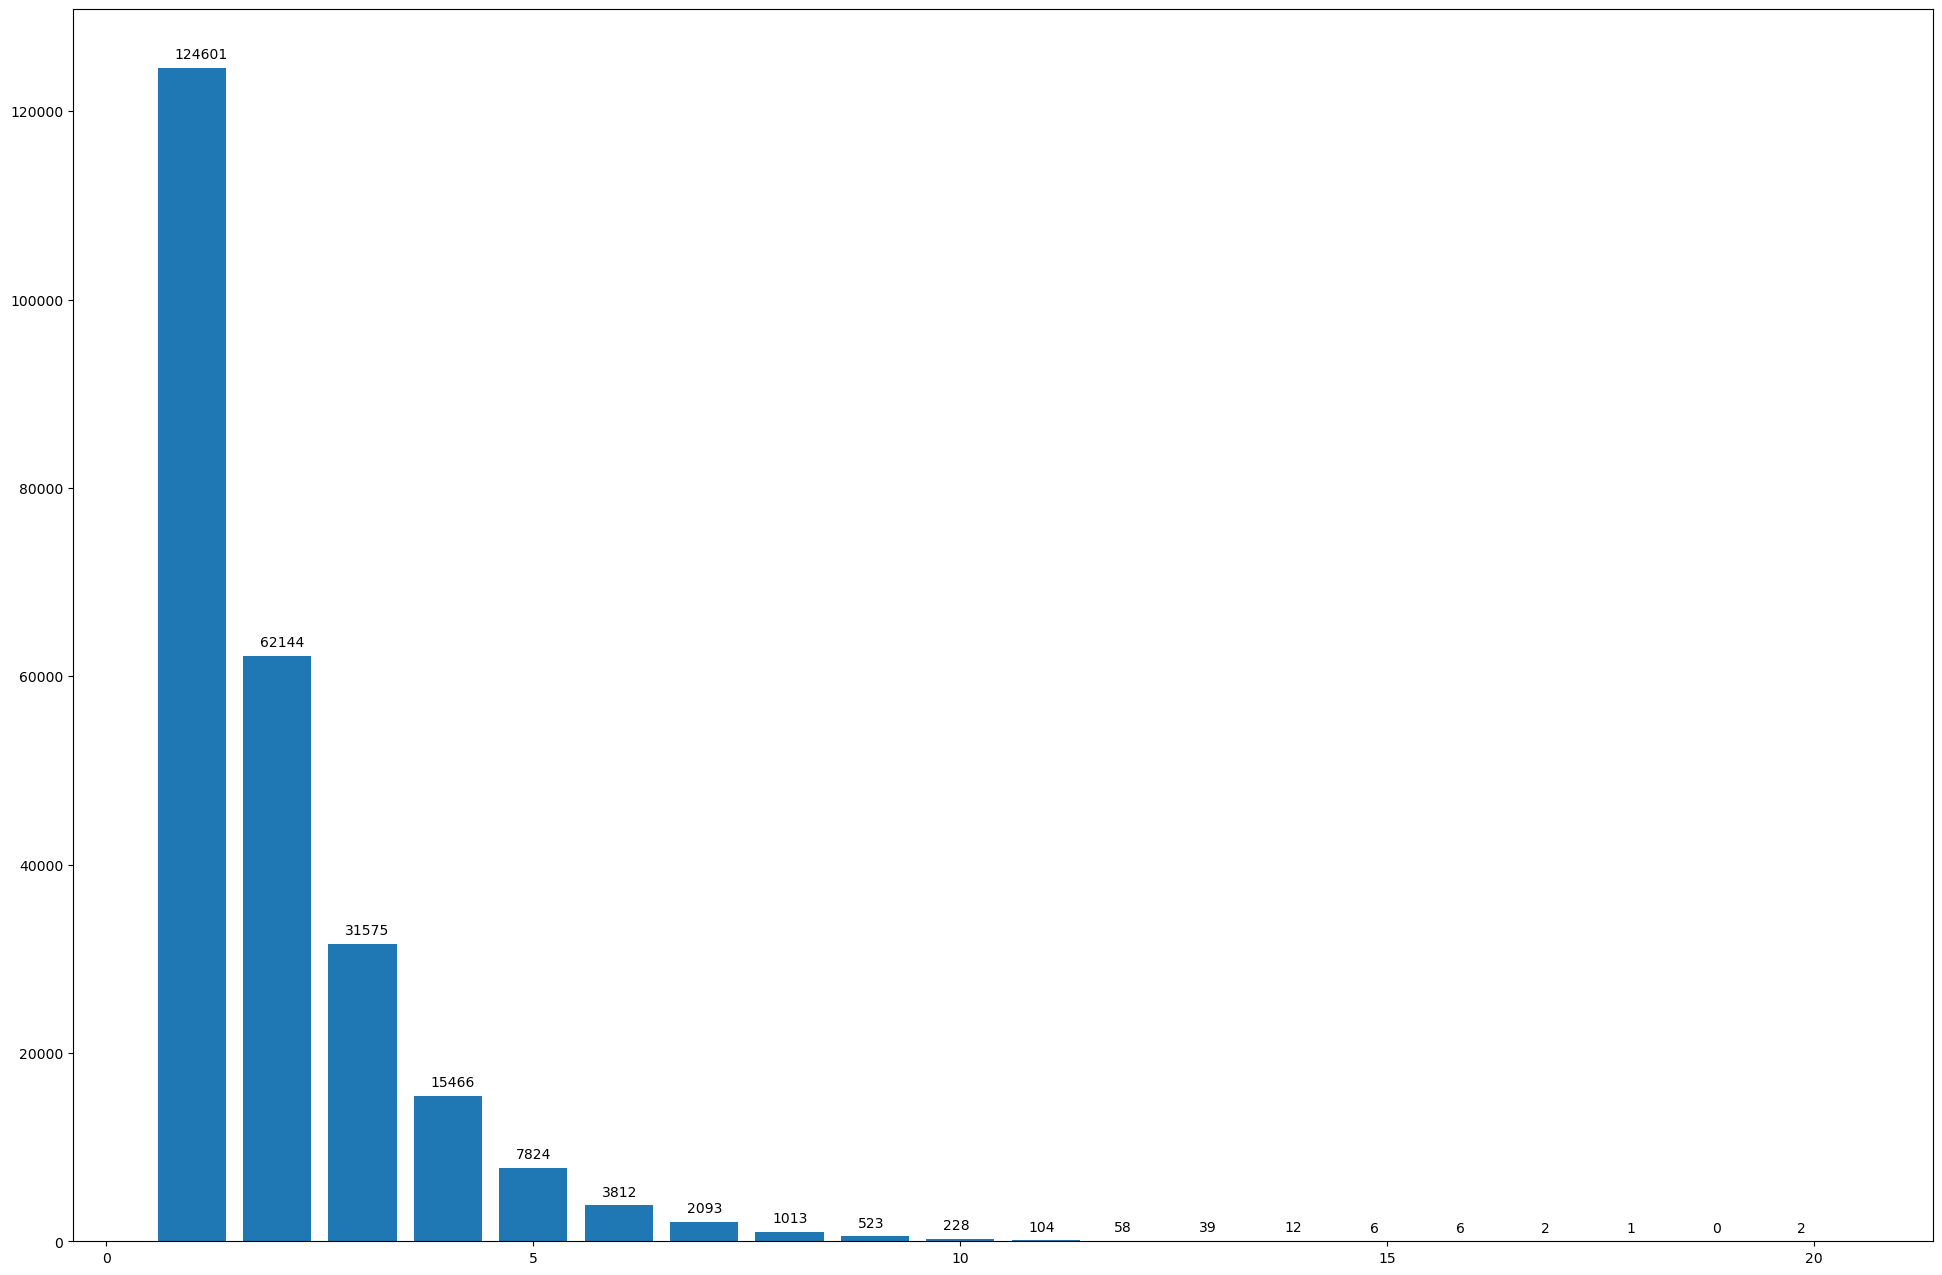

In [315]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes, frequencies)
# plt.xticks(np.arange(0, 55, 5))
plt.xticks(np.arange(0, 25, 5))
addlabels(streak_sizes, frequencies)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

### - PerfectMM Combined (mirrored)

In [316]:
streak_sizes_comb = []
frequencies_comb = []

streak_sizes_0 = sorted(list(perfect_dict_0.keys()))
streak_sizes_0 = list(np.arange(min(streak_sizes_0), max(streak_sizes_0)+1, 1))
frequencies_0 = [perfect_dict_0[x] for x in streak_sizes_0][::-1]

streak_sizes_0 = sorted([x*(-1) for x in streak_sizes_0])
# frequencies_0 = frequencies_0[::-1]

print(streak_sizes_0)
print(frequencies_0)

streak_sizes_1 = sorted(list(perfect_dict_1.keys()))
streak_sizes_1 = list(np.arange(min(streak_sizes_1), max(streak_sizes_1)+1, 1))
frequencies_1 = [perfect_dict_1[x] for x in streak_sizes_1]

print(streak_sizes_1)
print(frequencies_1)

streak_sizes_comb.extend(streak_sizes_0)
streak_sizes_comb.extend(streak_sizes_1)
frequencies_comb.extend(frequencies_0)
frequencies_comb.extend(frequencies_1)

print(streak_sizes_comb)
print(frequencies_comb)

[-17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
[3, 4, 9, 24, 28, 55, 111, 248, 461, 979, 2003, 3955, 7940, 15672, 30936, 62676, 124404]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[124601, 62144, 31575, 15466, 7824, 3812, 2093, 1013, 523, 228, 104, 58, 39, 12, 6, 6, 2, 1, 0, 2]
[-17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[3, 4, 9, 24, 28, 55, 111, 248, 461, 979, 2003, 3955, 7940, 15672, 30936, 62676, 124404, 124601, 62144, 31575, 15466, 7824, 3812, 2093, 1013, 523, 228, 104, 58, 39, 12, 6, 6, 2, 1, 0, 2]


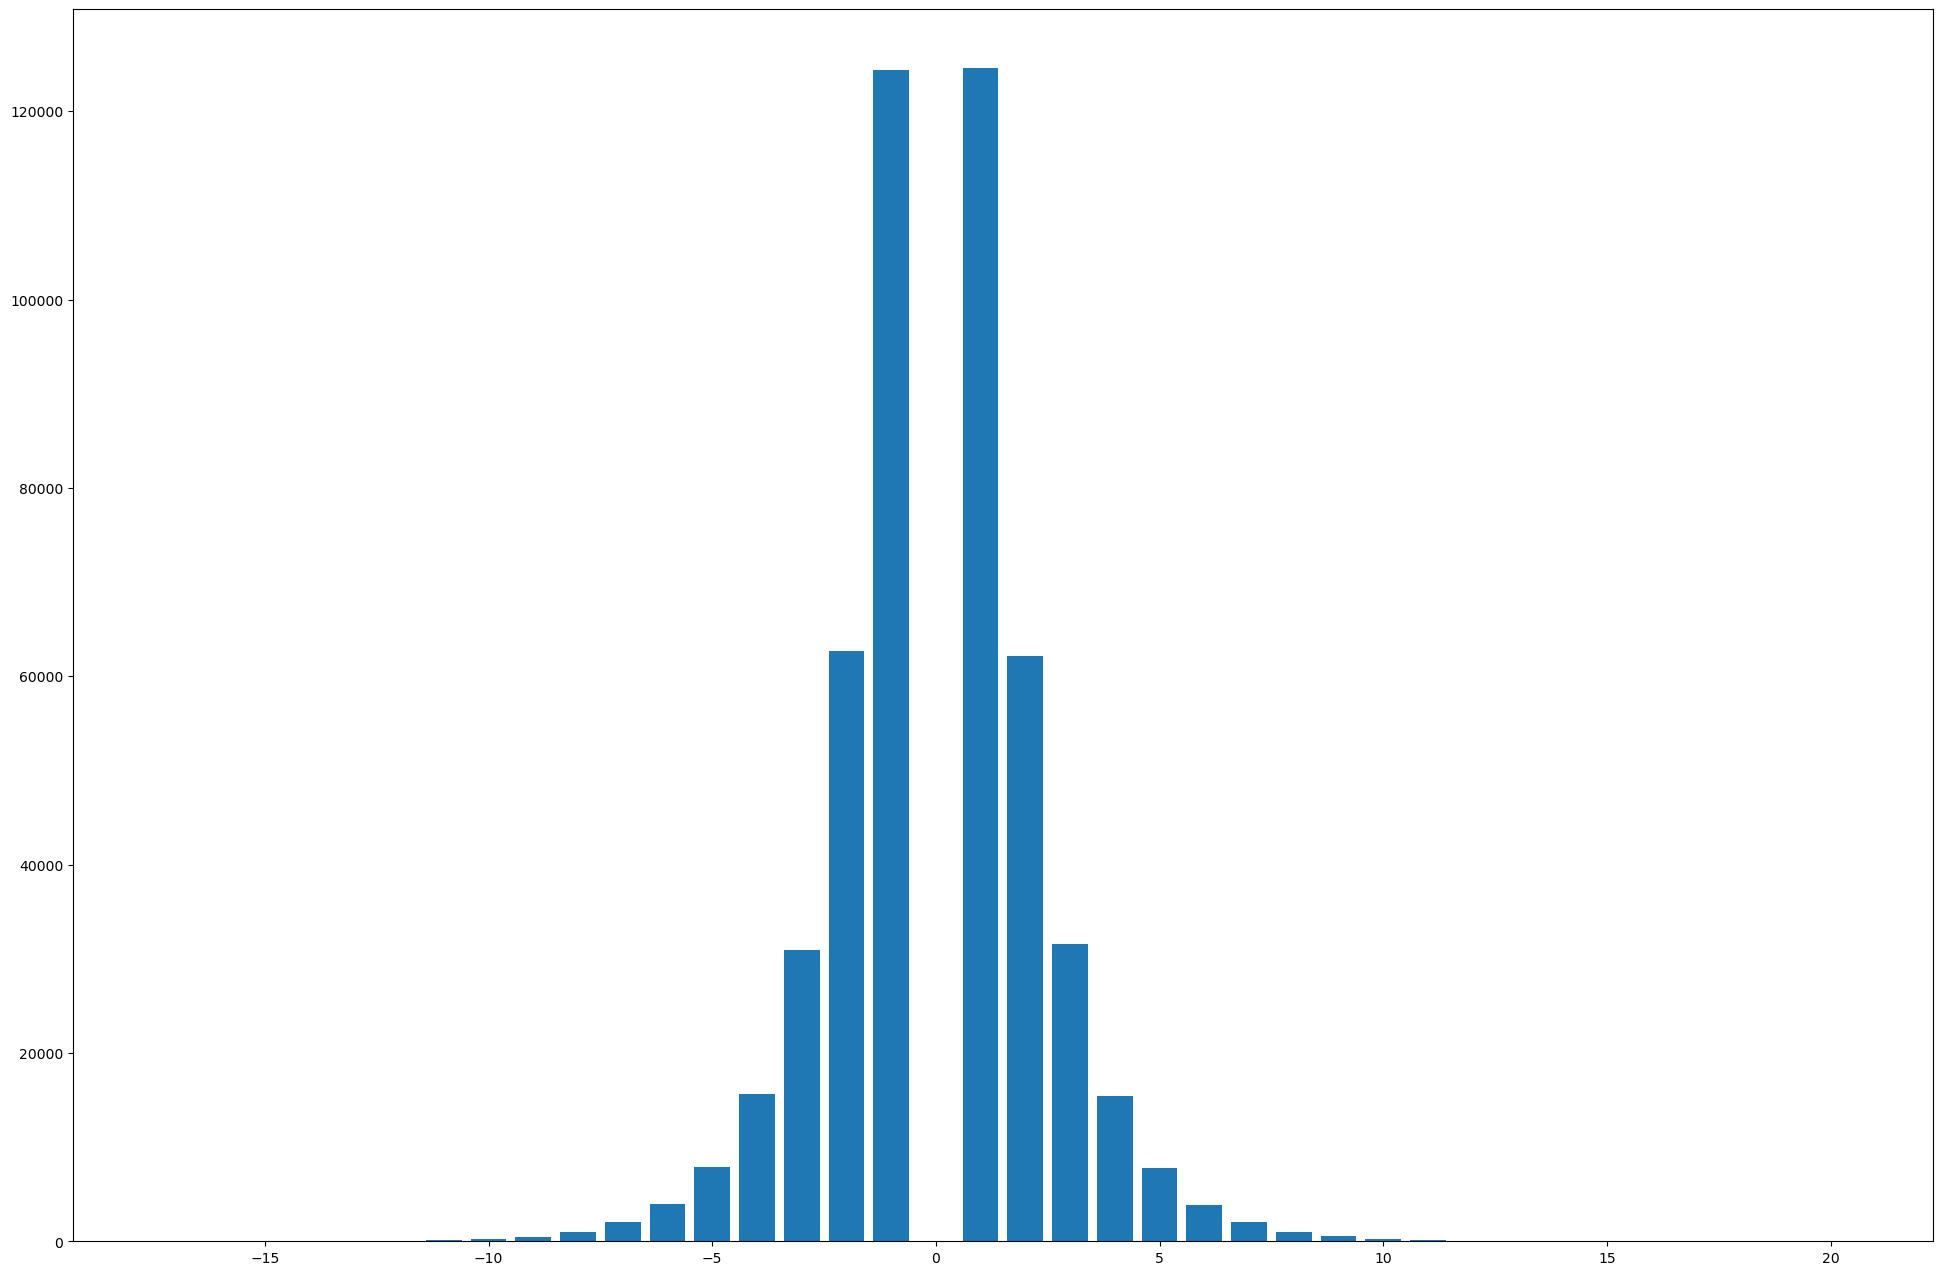

In [317]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes_comb, frequencies_comb)
# plt.xticks(np.arange(0, 55, 5))
# plt.xticks(np.arange(0, 25, 5))
# addlabels(streak_sizes_comb, frequencies_comb)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

In [322]:
print(len(frequencies_comb))
print(len(streak_sizes_comb))
print('---')

total_sum = 0

for i in range(len(frequencies_comb)):
    # print(i)
    total_sum += frequencies_comb[i] * streak_sizes_comb[i]
    
# print(total_sum/1000000)

37
37
---
1e-05


In [308]:
np.max(perfectmm_counted[0])

17

### NearPerfectMM 0

In [241]:
nearperfect_dict_0 = Counter(nearperfectmm_counted[0])

# sorted(perfect_dict_0.items())

streak_sizes = sorted(list(nearperfect_dict_0.keys()))
streak_sizes = list(np.arange(min(streak_sizes), max(streak_sizes)+1, 1))
# frequencies = list(perfect_dict_0.values())
frequencies = [nearperfect_dict_0[x] for x in streak_sizes]

print(streak_sizes)
print(frequencies)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[125225, 62204, 31120, 15849, 7717, 4078, 1916, 961, 476, 254, 117, 77, 34, 10, 8, 4, 1, 0, 0, 1]


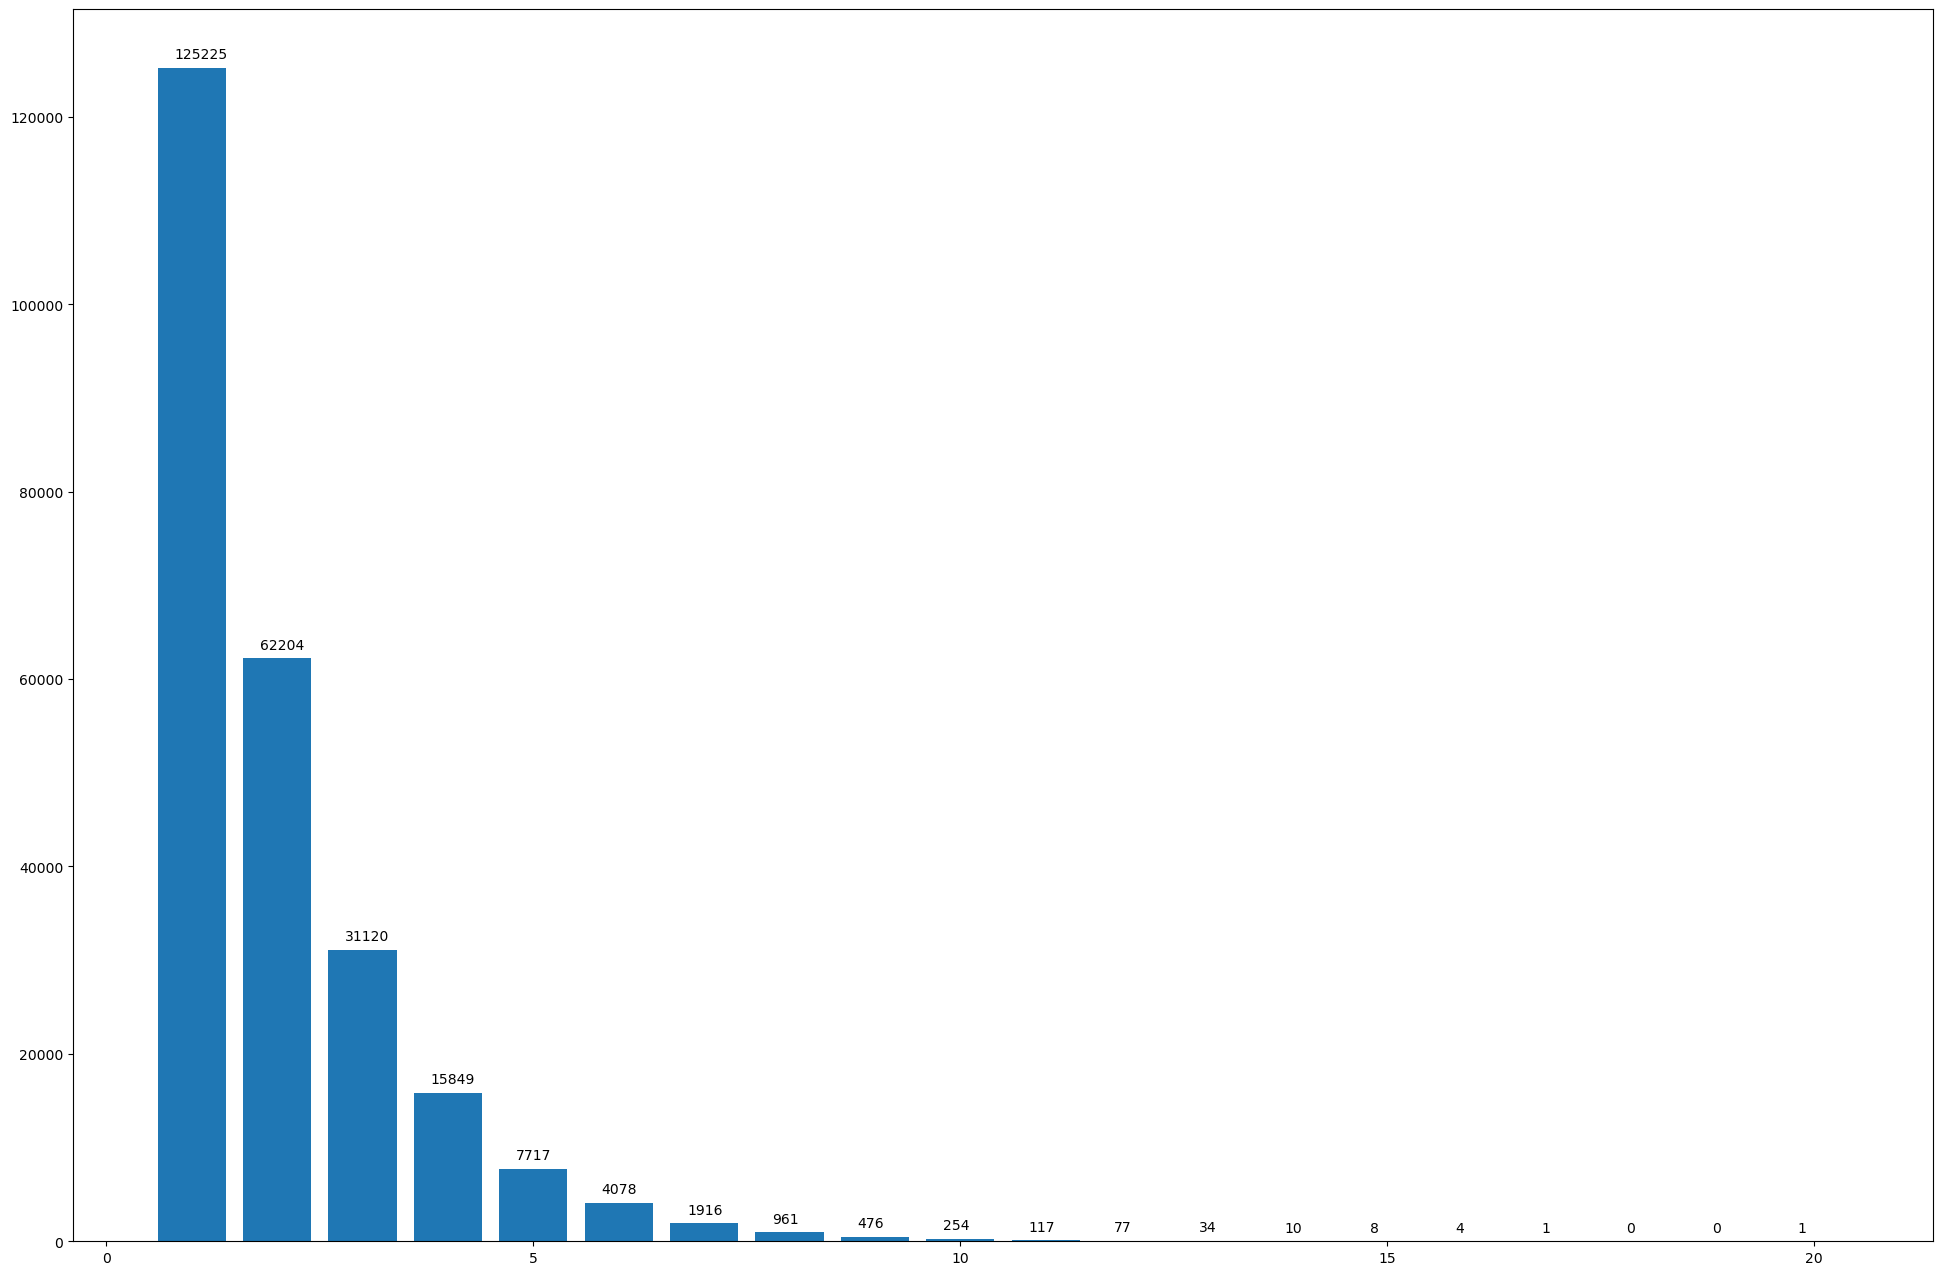

In [242]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes, frequencies)
# plt.xticks(np.arange(0, 55, 5))
plt.xticks(np.arange(0, 25, 5))
addlabels(streak_sizes, frequencies)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

### NearPerfectMM 1

In [243]:
nearperfect_dict_1 = Counter(nearperfectmm_counted[1])

# sorted(perfect_dict_0.items())

streak_sizes = sorted(list(nearperfect_dict_1.keys()))
streak_sizes = list(np.arange(min(streak_sizes), max(streak_sizes)+1, 1))
# frequencies = list(perfect_dict_0.values())
frequencies = [nearperfect_dict_1[x] for x in streak_sizes]

print(streak_sizes)
print(frequencies)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[125231, 62650, 30970, 15522, 7842, 3902, 1946, 1003, 493, 274, 107, 56, 21, 20, 8, 3, 1, 2, 0, 0, 0, 0, 1]


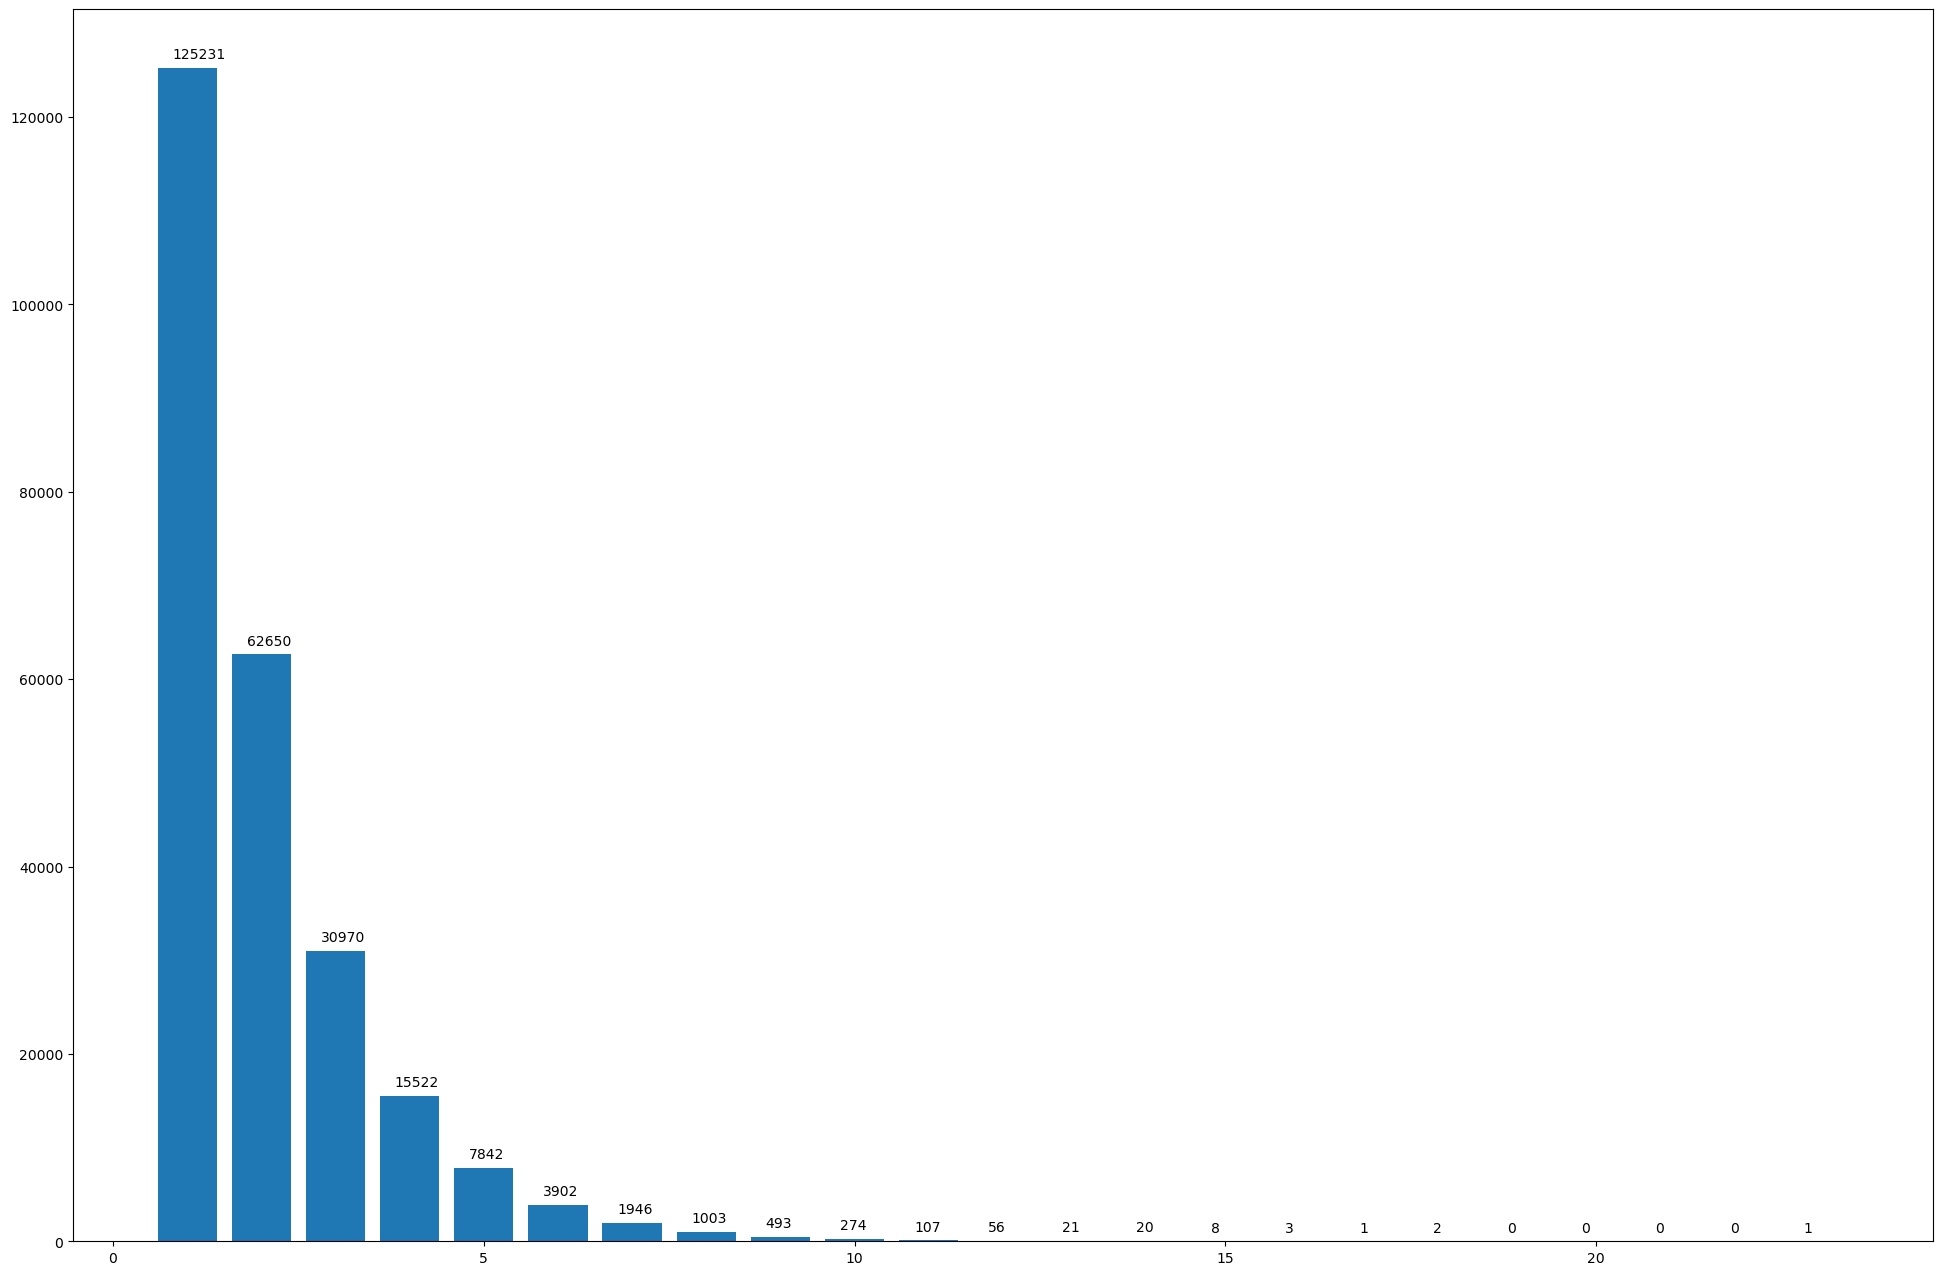

In [244]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes, frequencies)
# plt.xticks(np.arange(0, 55, 5))
plt.xticks(np.arange(0, 25, 5))
addlabels(streak_sizes, frequencies)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

### StreakMM 0

In [245]:
streak_dict_0 = Counter(streakmm_counted[0])

# sorted(perfect_dict_0.items())

streak_sizes = sorted(list(streak_dict_0.keys()))
streak_sizes = list(np.arange(min(streak_sizes), max(streak_sizes)+1, 1))
# frequencies = list(perfect_dict_0.values())
frequencies = [streak_dict_0[x] for x in streak_sizes]

print(streak_sizes)
print(frequencies)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
[63848, 21473, 13441, 10201, 8198, 10454, 5306, 3398, 2420, 1896, 1586, 1995, 981, 590, 467, 316, 300, 377, 205, 103, 82, 76, 56, 63, 37, 12, 15, 13, 14, 13, 6, 3, 7, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


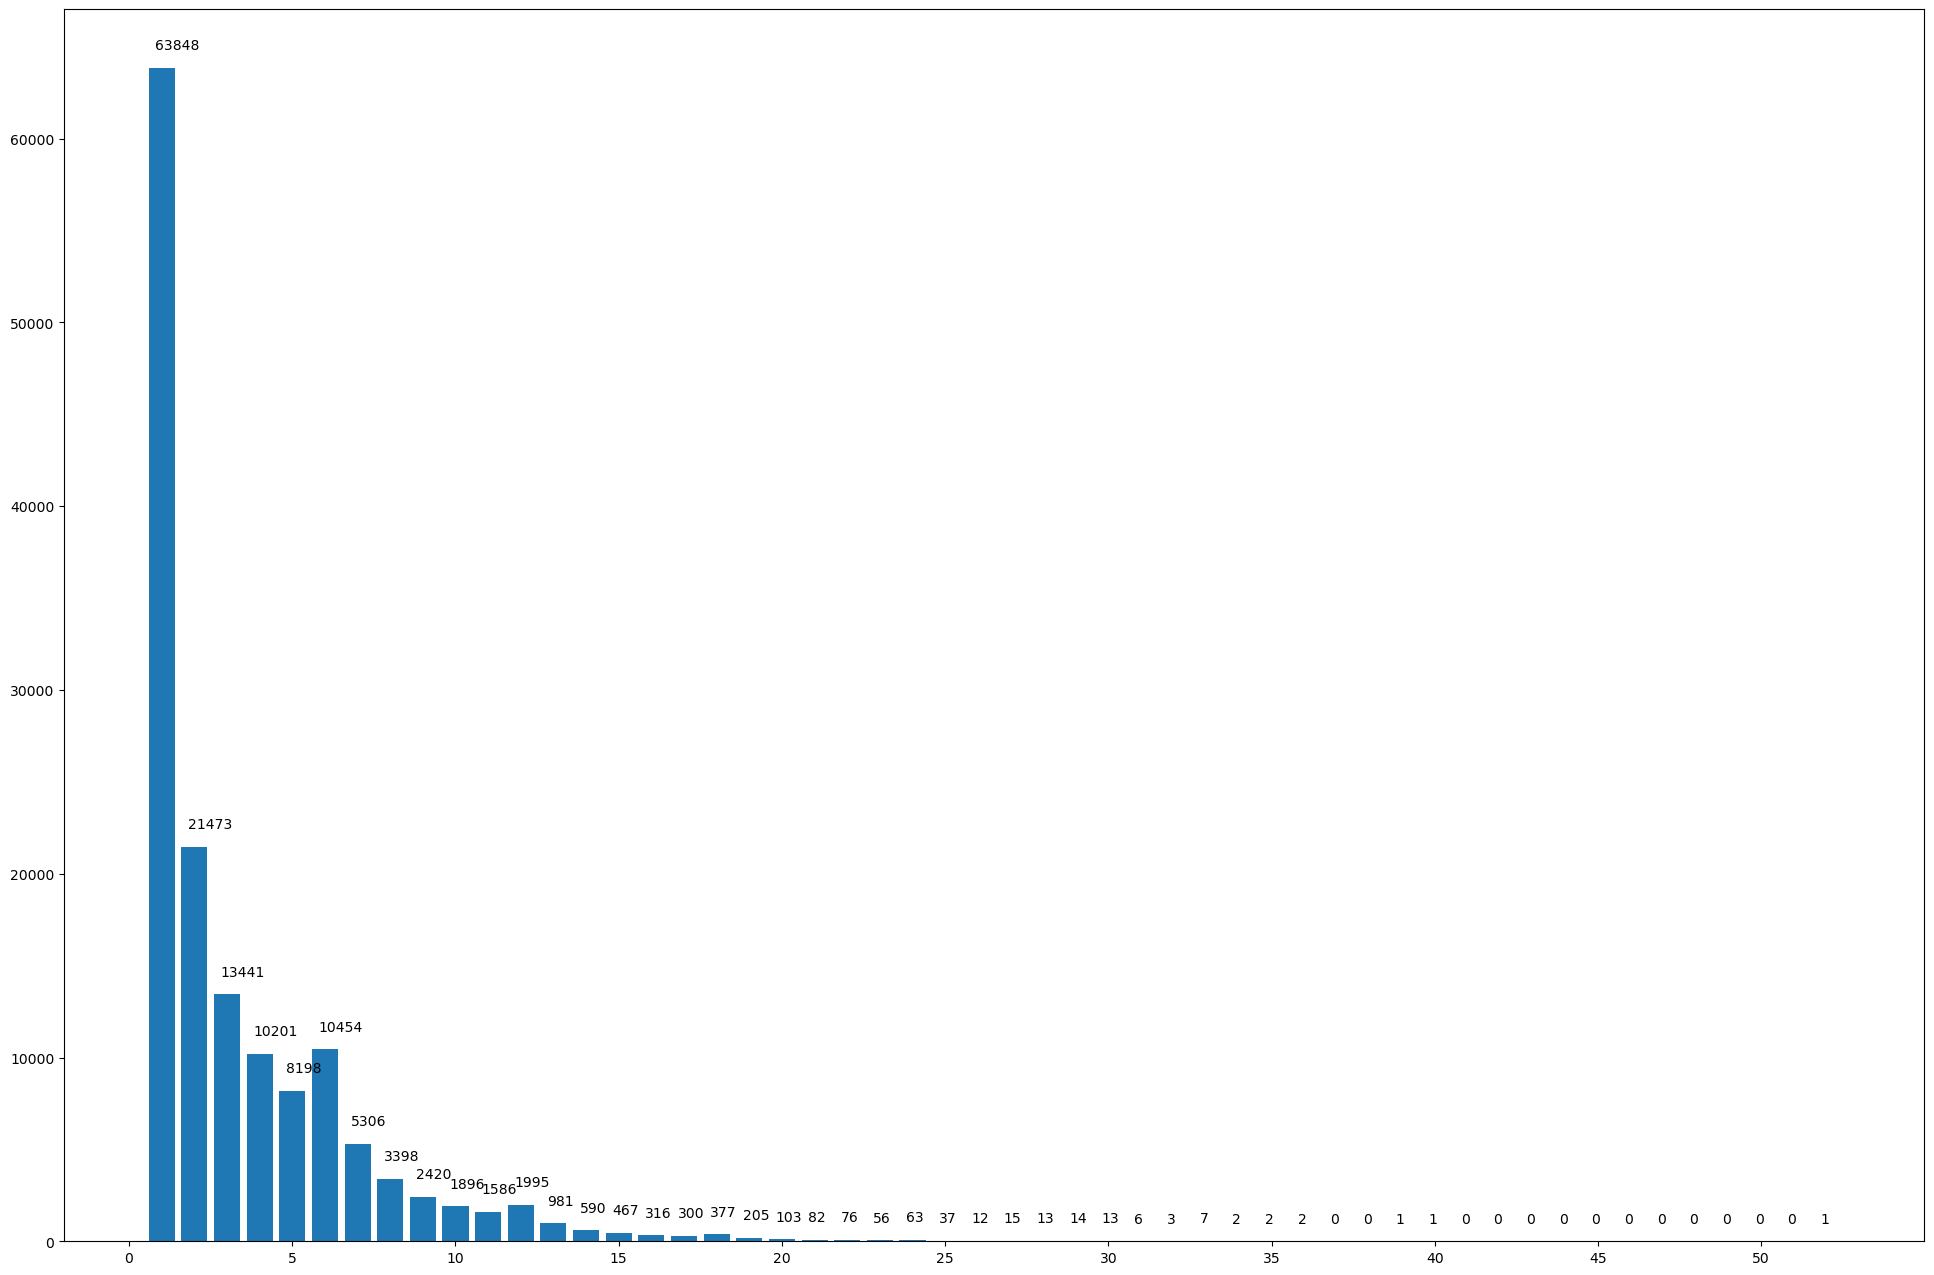

In [246]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes, frequencies)
plt.xticks(np.arange(0, 55, 5))
# plt.xticks(np.arange(0, 25, 5))
addlabels(streak_sizes, frequencies)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

### StreakMM 1

In [247]:
streak_dict_1 = Counter(streakmm_counted[1])

# sorted(perfect_dict_0.items())

streak_sizes = sorted(list(streak_dict_1.keys()))
streak_sizes = list(np.arange(min(streak_sizes), max(streak_sizes)+1, 1))
# frequencies = list(perfect_dict_0.values())
frequencies = [streak_dict_1[x] for x in streak_sizes]
# frequencies = [streak_dict_1[x] if streak_dict_1[x] != 0 else np.nan for x in streak_sizes]


print(streak_sizes)
print(frequencies)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[63688, 21255, 13532, 10327, 8261, 10441, 5374, 3301, 2492, 1874, 1520, 1983, 1021, 644, 480, 358, 270, 392, 198, 128, 79, 77, 60, 71, 36, 30, 16, 6, 7, 10, 8, 4, 2, 5, 0, 5, 3, 1, 1]


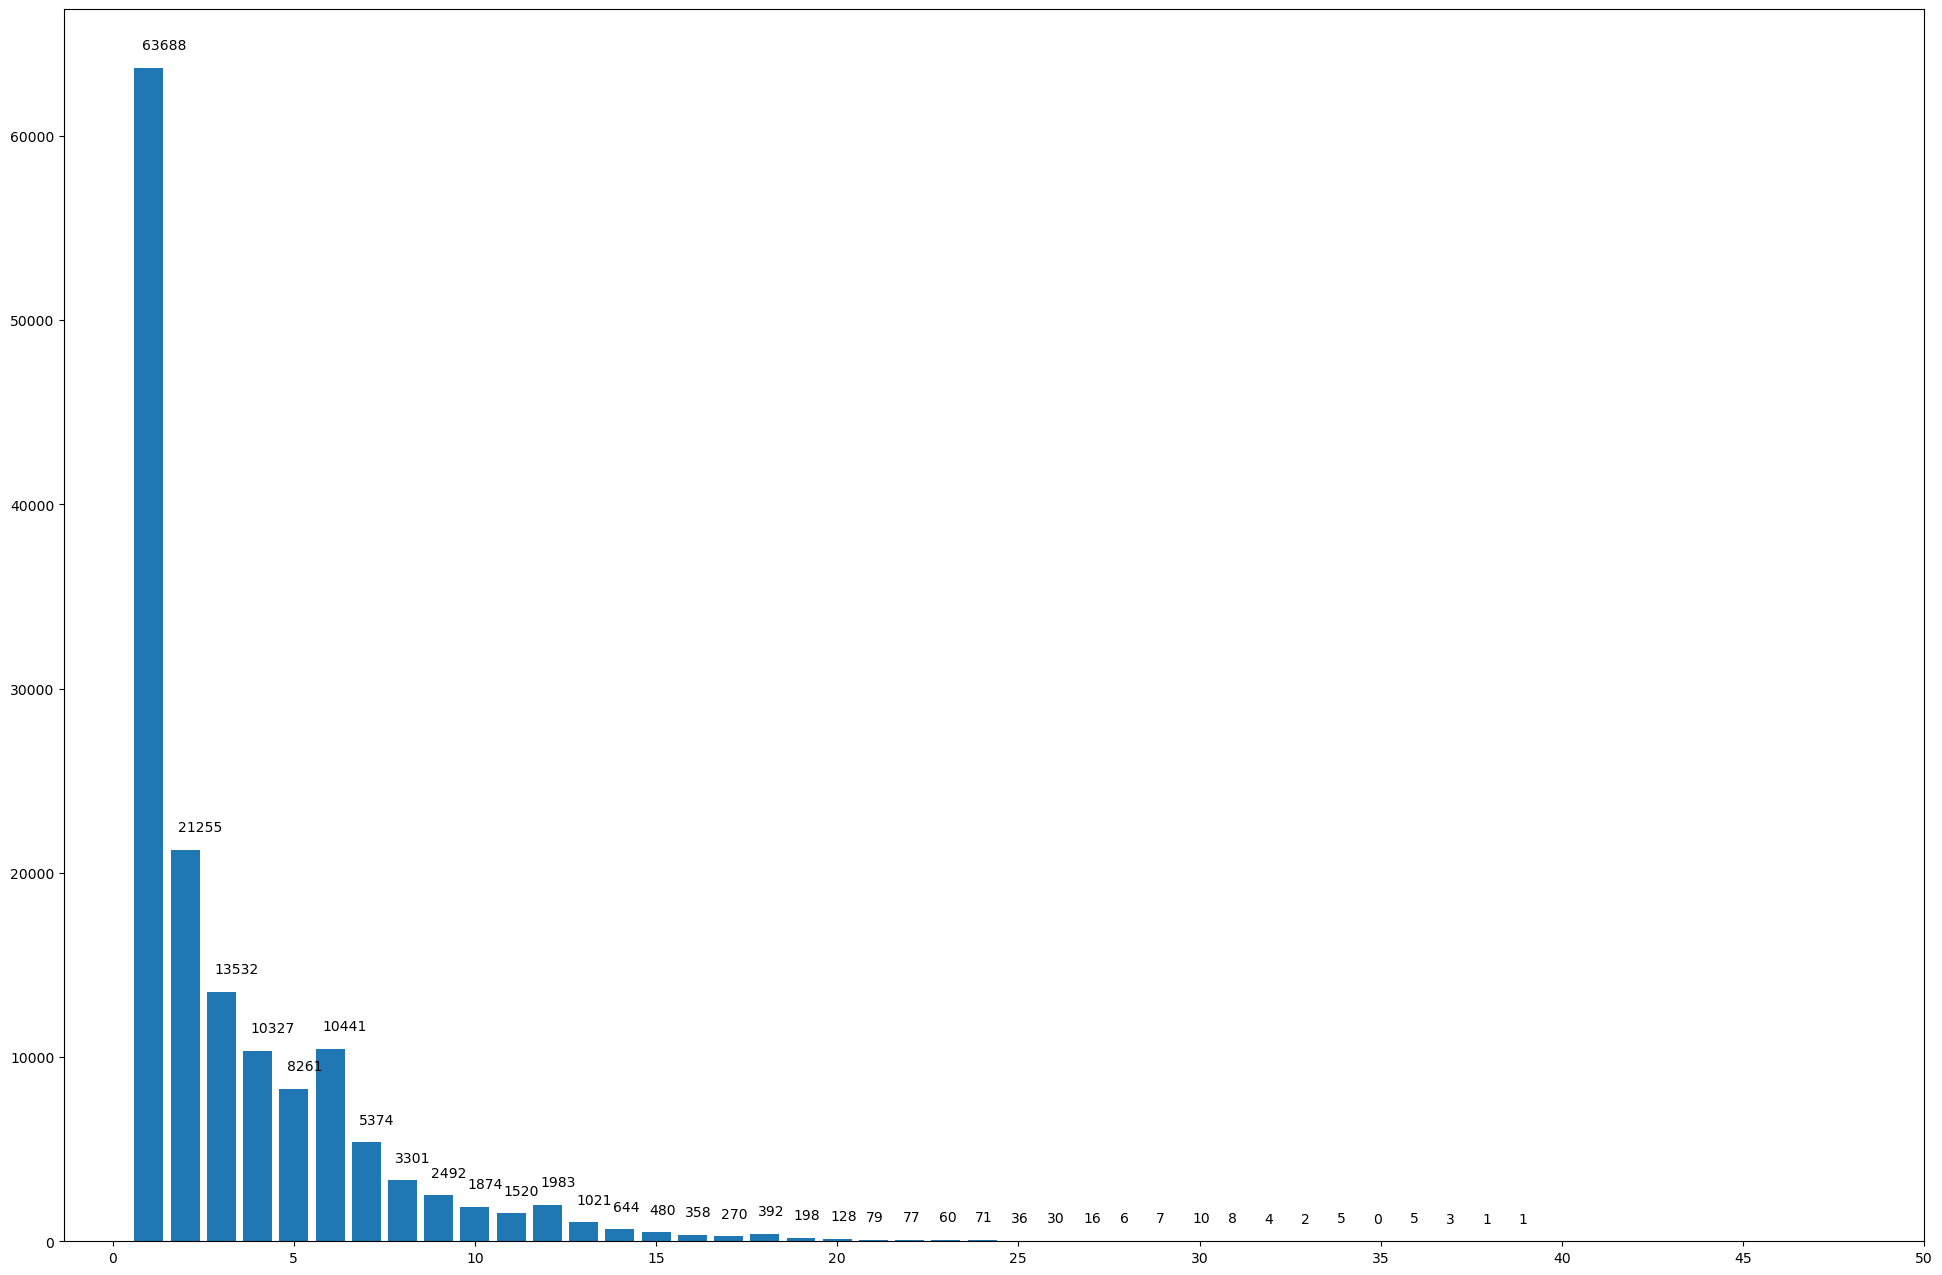

In [248]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes, frequencies)
plt.xticks(np.arange(0, 55, 5))
# plt.xticks(np.arange(0, 25, 5))
addlabels(streak_sizes, frequencies)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

#### Log N StreakMM 1

/var/folders/hy/qpbtwlds2_770m_zvdjp52xc0000gn/T/ipykernel_23900/555733902.py:2: RuntimeWarning: divide by zero encountered in log
  plt.bar(streak_sizes, list(np.log(frequencies)))


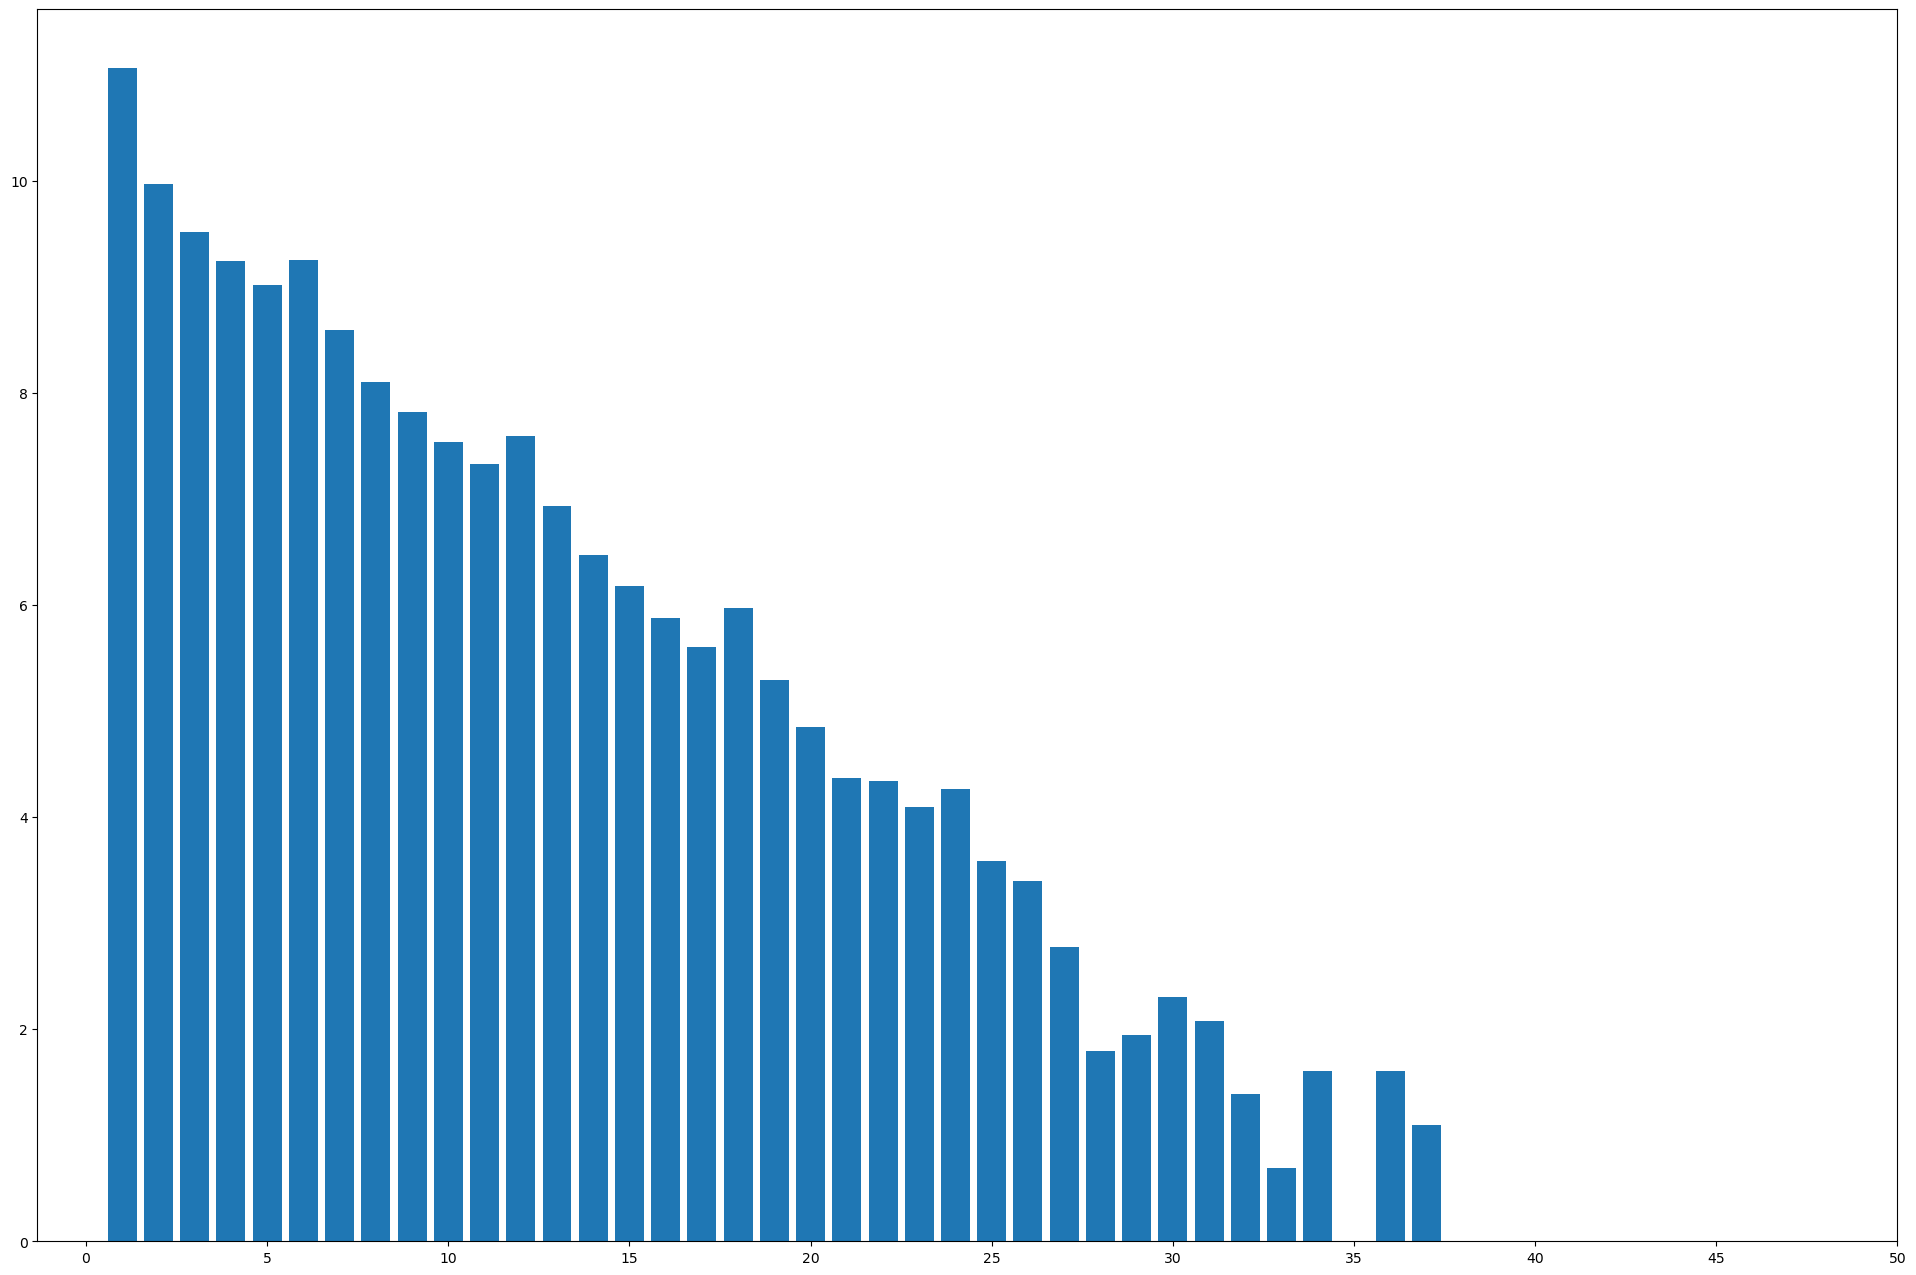

In [249]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes, list(np.log(frequencies)))
# plt.bar(np.log(streak_sizes), list(np.log(frequencies)))
plt.xticks(np.arange(0, 55, 5))
# plt.xticks(np.arange(0, 25, 5))
# addlabels(streak_sizes, frequencies)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

In [250]:
np.log(frequencies)

/var/folders/hy/qpbtwlds2_770m_zvdjp52xc0000gn/T/ipykernel_23900/298629246.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(frequencies)


array([11.06175144,  9.96434744,  9.51281253,  9.2425171 ,  9.01930092,
        9.25349564,  8.58932779,  8.10198073,  7.82084088,  7.53583046,
        7.32646561,  7.59236613,  6.92853782,  6.46769873,  6.1737861 ,
        5.88053299,  5.59842196,  5.97126184,  5.28826703,  4.85203026,
        4.36944785,  4.34380542,  4.09434456,  4.26267988,  3.58351894,
        3.40119738,  2.77258872,  1.79175947,  1.94591015,  2.30258509,
        2.07944154,  1.38629436,  0.69314718,  1.60943791,        -inf,
        1.60943791,  1.09861229,  0.        ,  0.        ])

In [251]:
frequencies

[63688,
 21255,
 13532,
 10327,
 8261,
 10441,
 5374,
 3301,
 2492,
 1874,
 1520,
 1983,
 1021,
 644,
 480,
 358,
 270,
 392,
 198,
 128,
 79,
 77,
 60,
 71,
 36,
 30,
 16,
 6,
 7,
 10,
 8,
 4,
 2,
 5,
 0,
 5,
 3,
 1,
 1]

In [252]:
np.log(np.nan)

nan

In [253]:
list(np.arange(1, 20+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
print(-1*8)